In [1]:
import os

# Specify the directory path you want to set as the working directory
directory_path =  '/Users/rachm/PyPSA-GB/Dissertation'

# Change the current working directory to the specified directory path
try:
    os.chdir(directory_path)
    print(f"Current working directory changed to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: The directory at {directory_path} was not found.")

Current working directory changed to: C:\Users\rachm\PyPSA-GB\Dissertation


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature

import imageio

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

from statistics import mean

In [3]:
df_network = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv')
lon = df_network['x'].values
lat = df_network['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('../data/network/BusesBasedGBsystem/lines.csv', index_col=0)
df_buses = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv', index_col=0)

In [4]:
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])

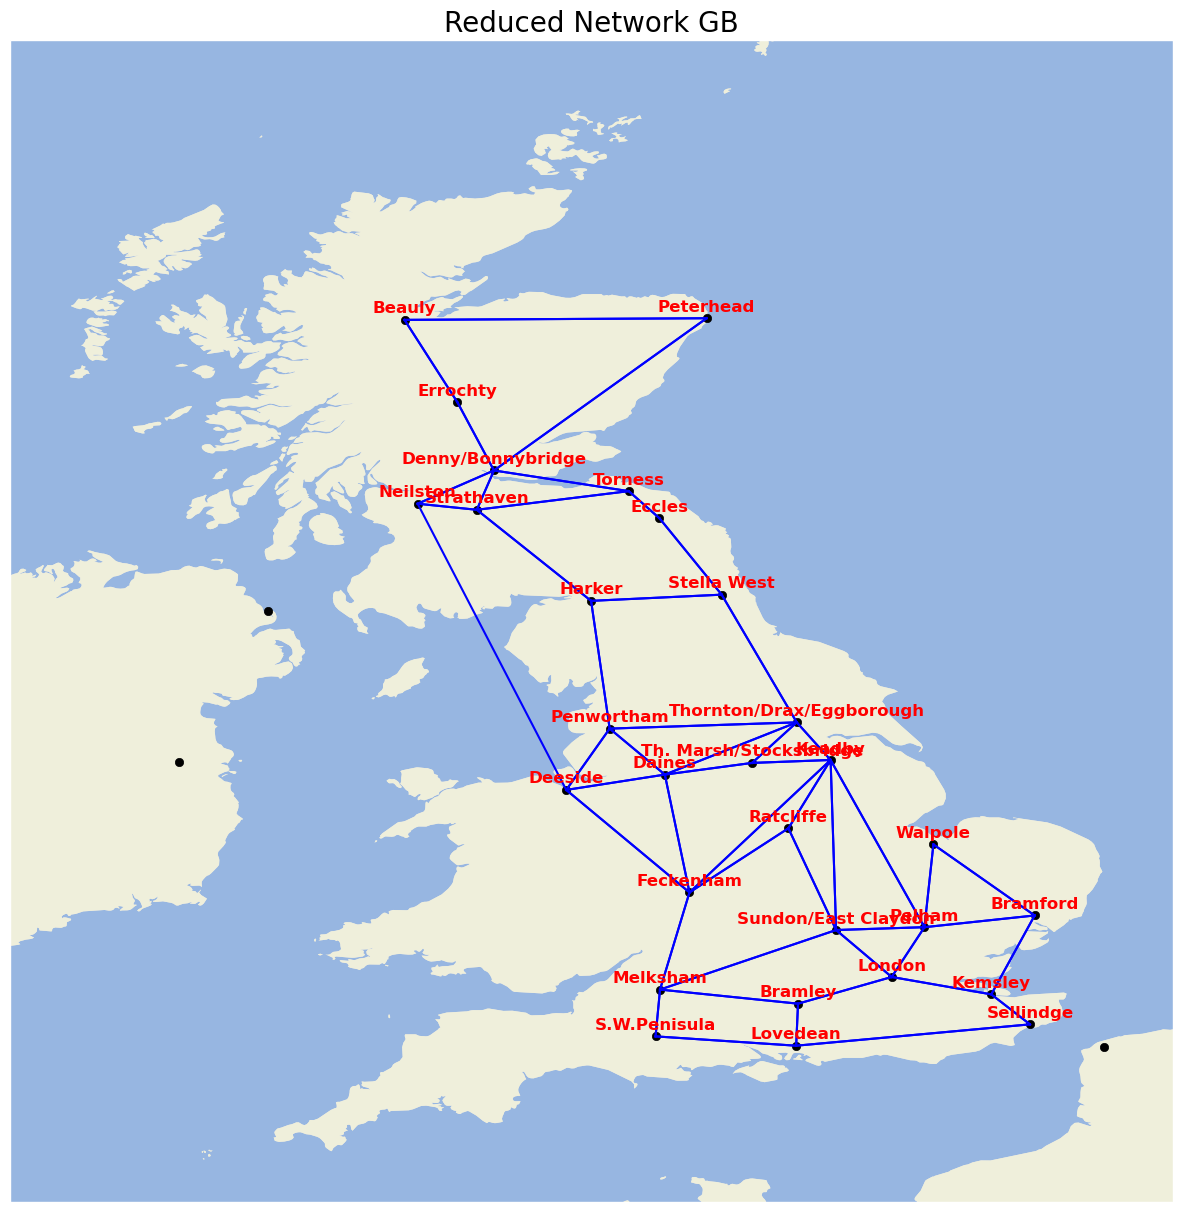

In [5]:
fig = plt.figure()
fig.set_size_inches(15, 17)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

extent = [-8.09782, 2.40511, 60, 49.5]
ax.set_extent(extent)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses[:29].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB', fontsize=20)

plt.show()

In [6]:
df_buses.iloc[:29, :]

v_nom carrier         x          y
name                                                        
Beauly                      275      AC -4.533299  57.469876
Peterhead                   275      AC -1.804331  57.484481
Errochty                    275      AC -4.054907  56.724571
Denny/Bonnybridge           275      AC -3.725282  56.109237
Neilston                    400      AC -4.414788  55.808831
Strathaven                  400      AC -3.880268  55.753988
Torness                     400      AC -2.507448  55.922401
Eccles                      400      AC -2.229827  55.677255
Harker                      400      AC -2.847820  54.931176
Stella West                 400      AC -1.667840  54.987162
Penwortham                  400      AC -2.679880  53.776910
Deeside                     400      AC -3.072208  53.223030
Daines                      400      AC -2.181395  53.361456
Th. Marsh/Stocksbridge      400      AC -1.392936  53.467042
Thornton/Drax/Eggborough    400      AC -0.989753  53.833428
Keadby                      400      AC -0.683866  53.493436
Ratcliffe                   400      AC -1.065185  52.876444
Feckenham                   400      AC -1.958841  52.296944
Walpole                     400      AC  0.244973  52.730476
Bramford                    400      AC  1.159651  52.088738
Pelham                      400      AC  0.164054  51.982791
Sundon/East Claydon         400      AC -0.634044  51.957294
Melksham                    400      AC -2.224944  51.419196
Bramley                     400      AC -0.978219  51.291877
London                      400      AC -0.131943  51.532973
Kemsley                     400      AC  0.768177  51.376012
Sellindge                   400      AC  1.117562  51.104927
Lovedean                    400      AC -0.995022  50.912050
S.W.Penisula                400      AC -2.265294  50.996346

In [7]:
df_lines

bus0               bus1        r        x       b  s_nom
name                                                                  
0           Beauly          Peterhead  0.01220  0.02000  0.0856    525
1           Beauly           Errochty  0.00700  0.15000  0.0520    132
2           Beauly          Peterhead  0.01220  0.02000  0.2844    525
3           Beauly           Errochty  0.00700  0.15000  0.0520    132
4        Peterhead  Denny/Bonnybridge  0.00040  0.06500  0.4454    760
...            ...                ...      ...      ...     ...    ...
94       Sellindge            Kemsley  0.00020  0.00503  0.1797   3100
95        Lovedean          Sellindge  0.00038  0.00711  0.2998   3070
96        Lovedean          Sellindge  0.00038  0.00711  0.2998   3070
97    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400   2780
98    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400   2780

[99 rows x 6 columns]

In [8]:
df_interconnectors = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links.csv', index_col=0)
df_interconnectors

bus0       bus1 carrier  p_nom
name                                           
BritNed   Netherlands    Kemsley      DC   1100
EastWest      Ireland    Deeside      DC    600
Moyle      N. Ireland   Neilston      DC    600
Nemo          Belgium  Sellindge      DC   1100
IFA           France1  Sellindge      DC   2100
IFA2          France2   Lovedean      DC   1100

In [9]:
df_interconnectors_future = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_future.csv', index_col=0)
df_interconnectors_future

bus0          bus1 carrier  p_nom installed date  \
name                                                                    
BritNed       Netherlands       Kemsley      DC   1000     01/01/2020   
EastWest          Ireland       Deeside      DC    600     01/01/2020   
Moyle          N. Ireland      Neilston      DC    600     01/01/2020   
Nemo              Belgium     Sellindge      DC   1000     01/01/2020   
IFA               France1     Sellindge      DC   2000     01/01/2020   
IFA2              France2      Lovedean      DC   1000     01/01/2020   
NSL                Norway   Stella West      DC   1400     01/01/2021   
ElecLink          France1     Sellindge      DC   1000     01/01/2022   
Viking Link       Denmark       Walpole      DC   1400     01/01/2023   
Greenlink        Ireland2      Melksham      DC    500     01/01/2023   
GridLink          France1       Kemsley      DC   1400     01/01/2024   
NeuConnect        Germany       Kemsley      DC   1400     01/01/2024   
NorthConnect       Norway     Peterhead      DC   1400     01/01/2025   
FAB Link          France2  S.W.Penisula      DC   1400     01/01/2025   

              marginal_cost  
name                         
BritNed                  20  
EastWest                  7  
Moyle                     7  
Nemo                     20  
IFA                      15  
IFA2                     15  
NSL                       1  
ElecLink                 15  
Viking Link               7  
Greenlink                 7  
GridLink                 15  
NeuConnect               20  
NorthConnect              1  
FAB Link                 15

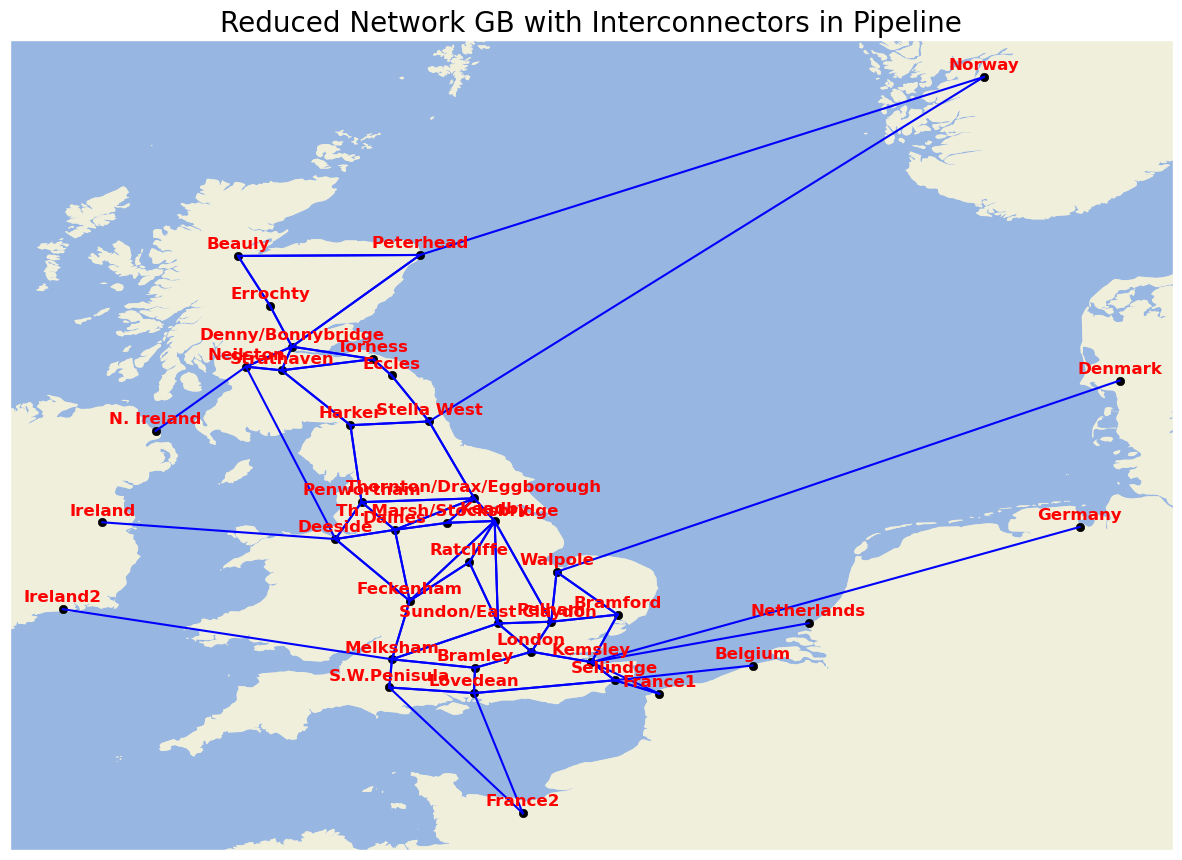

In [10]:
#define df
df_lines = pd.read_csv('../data/network/BusesBasedGBsystem/lines.csv', index_col=0)
df_buses = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv', index_col=0)
df_interconnectors = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_future.csv', index_col=0) 
df_buses_future = pd.read_csv('../data/network/BusesBasedGBsystem/interconnectors/links_new_buses.csv', index_col=0)

# concat new buses
df_buses = pd.concat([df_buses,df_buses_future])

# drop duplicate index incase future are already included
df_buses = df_buses[~df_buses.index.duplicated(keep='first')]
lon = df_buses['x'].values
lat = df_buses['y'].values
 
# append the interconnector data
df_lines_interconnectors = pd.concat([df_lines, df_interconnectors]).reset_index()

line_coordinates = []
for i in range(len(df_lines_interconnectors['bus0'].values)):

    bus0 = df_lines_interconnectors['bus0'].iloc[i]
    bus1 = df_lines_interconnectors['bus1'].iloc[i]
    bus0_coord = [df_buses['x'][bus0], df_buses['y'][bus0]]
    bus1_coord = [df_buses['x'][bus1], df_buses['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord]) # why it is still use append function??????

fig = plt.figure()
fig.set_size_inches(15, 30)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines_interconnectors['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='blue')

# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='red',
                fontsize='large')

ax.set_title('Reduced Network GB with Interconnectors in Pipeline', fontsize=20)

plt.show()

In [11]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature

import imageio

from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

from statistics import mean

import loads

In [13]:
df_loads = loads.read_historical_demand_data()
df_loads.rename(columns={'POWER_ESPENI_MW': 'load'}, inplace=True)
# add columns with year, month, and weekday name
df_loads['Year'] = df_loads.index.year
df_loads['Month'] = df_loads.index.month

Text(0, 0.5, 'Load [MW]')

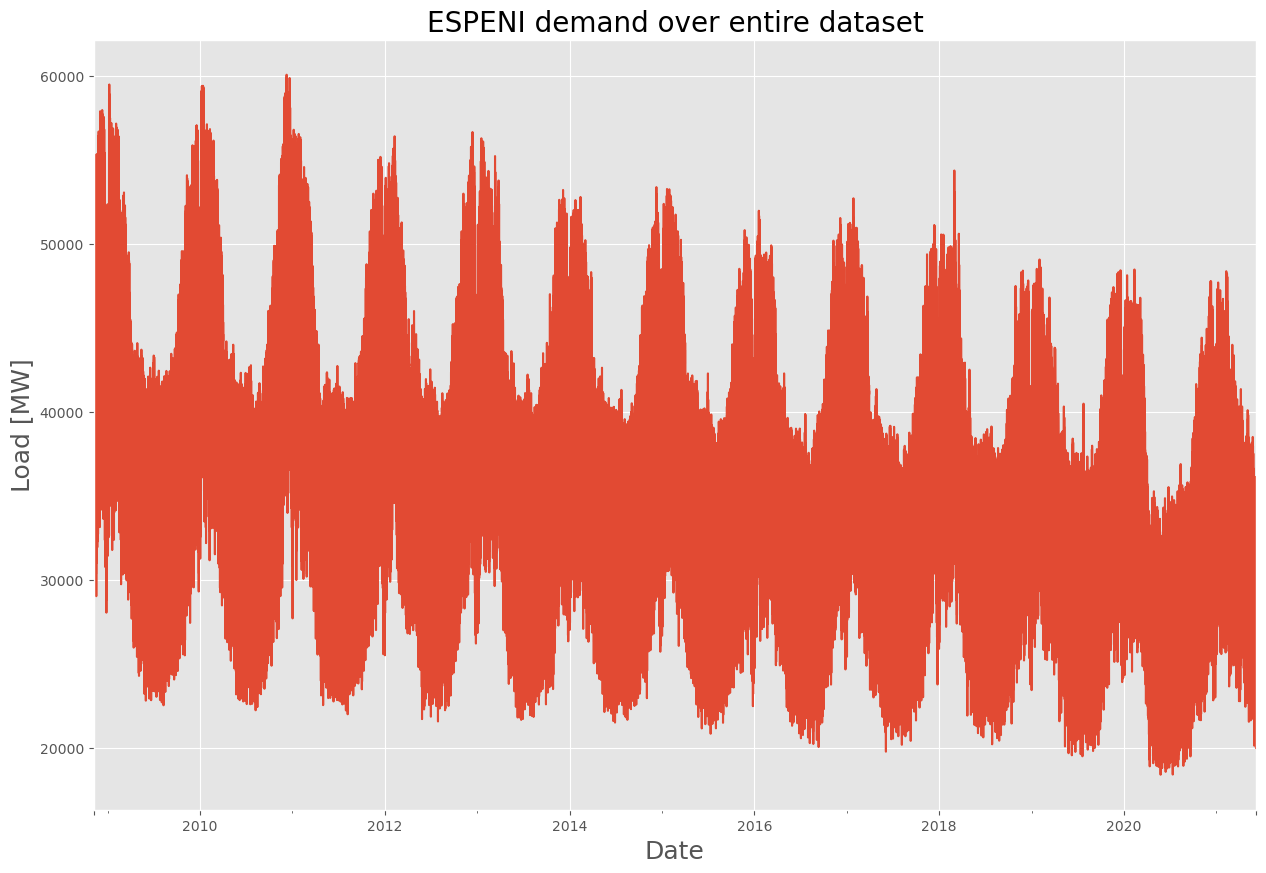

In [14]:
# Plot demand data
df_loads['load'].plot(linestyle='-', figsize=(15,10))
plt.title('ESPENI demand over entire dataset', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [4]:
import os
import sys
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [5]:
#create timeseries year 2035
start = '2035-01-01 00:00:00'
end = '2035-12-31 23:30:00'
year = int(start[0:4])
time_step = 0.5  # assuming 1 hour time step as a fraction
year_baseline = 2021

In [7]:
import loads  # Assuming loads is an imported module

# Write loads for the year 2035
loads.write_loads(year)

# Write load parameters based on the given scenario and baseline year
loads.write_loads_p_set(start, end, year, time_step, 'eload', year_baseline=year_baseline, scenario='Steady Progression', FES=2021)

Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  250.656960  388.665595  124.153251        1105.471719   
2035-01-01 00:30:00  231.001928  358.188744  114.417889        1018.787185   
2035-01-01 01:00:00  218.311319  338.510843  108.132086         962.817828   
2035-01-01 01:30:00  212.585134  329.631891  105.295842         937.563648   
2035-01-01 02:00:00  212.134098  328.932519  105.072438         935.574444   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  274.392575  425.469748  135.909772        1210.152842   
2035-12-31 22:00:00  258.902375  401.450835  128.237299        1141.836454   
2035-12-31 22:30:00  250.384682  388.243405  124.018389        1104.270896   
2035-12-31 23:00:00  248.839497  385.847459  123.253041        1097.456167   
2035-12-31 23:30:00  248.839497  385.847459  123.253041        1097.456167   

                        Neilston  Strathaven     Torness      Eccles  \
name                                                                   
2035-01-01 00:00:00  1310.094636  398.636815  345.546436   98.704987   
2035-01-01 00:30:00  1207.364786  367.378080  318.450734   90.965127   
2035-01-01 01:00:00  1141.035496  347.195342  300.955929   85.967754   
2035-01-01 01:30:00  1111.106766  338.088600  293.062022   83.712868   
2035-01-01 02:00:00  1108.749359  337.371286  292.440240   83.535256   
...                          ...         ...         ...         ...   
2035-12-31 21:30:00  1434.152244  436.385179  378.267480  108.051720   
2035-12-31 22:00:00  1353.190486  411.750060  356.913262  101.951909   
2035-12-31 22:30:00  1308.671540  398.203794  345.171084   98.597768   
2035-12-31 23:00:00  1300.595404  395.746379  343.040948   97.989297   
2035-12-31 23:30:00  1300.595404  395.746379  343.040948   97.989297   

                         Harker  Stella West  ...     Bramford      Pelham  \
name                                          ...                            
2035-01-01 00:00:00  363.352655  2205.774059  ...  1211.010457  751.432586   
2035-01-01 00:30:00  334.860695  2032.810341  ...  1116.050201  692.509700   
2035-01-01 01:00:00  316.464372  1921.133350  ...  1054.737482  654.465127   
2035-01-01 01:30:00  308.163687  1870.743085  ...  1027.072301  637.298869   
2035-01-01 02:00:00  307.509864  1866.773977  ...  1024.893188  635.946728   
...                         ...          ...  ...          ...         ...   
2035-12-31 21:30:00  397.759834  2414.646797  ...  1325.685425  822.588460   
2035-12-31 22:00:00  375.305220  2278.333481  ...  1250.846912  776.151125   
2035-12-31 22:30:00  362.957961  2203.378027  ...  1209.694991  750.616338   
2035-12-31 23:00:00  360.718058  2189.780435  ...  1202.229664  745.984099   
2035-12-31 23:30:00  360.718058  2189.780435  ...  1202.229664  745.984099   

                     Sundon/East Claydon     Melksham      Bramley  \
name                                                                 
2035-01-01 00:00:00          2499.581273  3320.851672  1133.020277   
2035-01-01 00:30:00          2303.578937  3060.450183  1044.175548   
2035-01-01 01:00:00          2177.026666  2892.317494   986.811424   
2035-01-01 01:30:00          2119.924460  2816.453606   960.927906   
2035-01-01 02:00:00          2115.426671  2810.478008   958.889130   
...                                  ...          ...          ...   
2035-12-31 21:30:00          2736.275681  3635.315151  1240.310073   
2035-12-31 22:00:00          2581.805548  3430.091817  1170.291228   
2035-12-31 22:30:00          2496.866091  3317.244382  1131.789529   
2035-12-31 23:00:00          2481.457313  3296.772846  1124.804975   
2035-12-31 23:30:00          2481.457313  3296.772846  1124.804975   

                          London      Kemsley   Sellindge     Lovedean  \
name                                                                     

In [8]:
import pandas as pd

# Read the generated loads data from the CSV file
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)

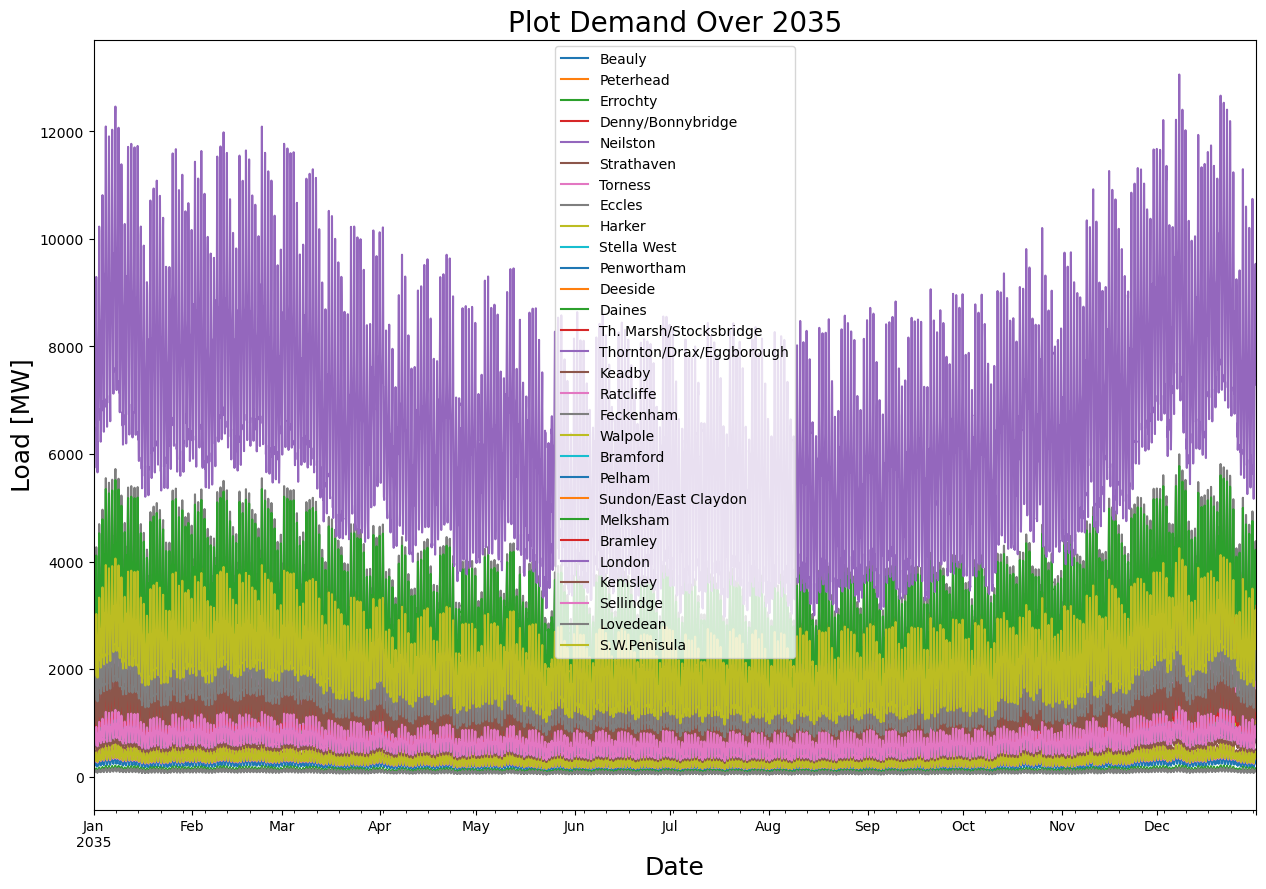

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Correct the file path as needed
file_path = ('LOPF_data/loads-p_set.csv')

# Read the loads data from the CSV file
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)

# Convert the index to datetime for accurate plotting
df_loads.index = pd.to_datetime(df_loads.index)

# Plot the load data
df_loads.plot(linestyle='-', figsize=(15, 10))

# Customize the plot
#plt.title('ESPENI Demand Over 2021', fontsize=20)
plt.title('Plot Demand Over 2035', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

# Display the plot
plt.show()

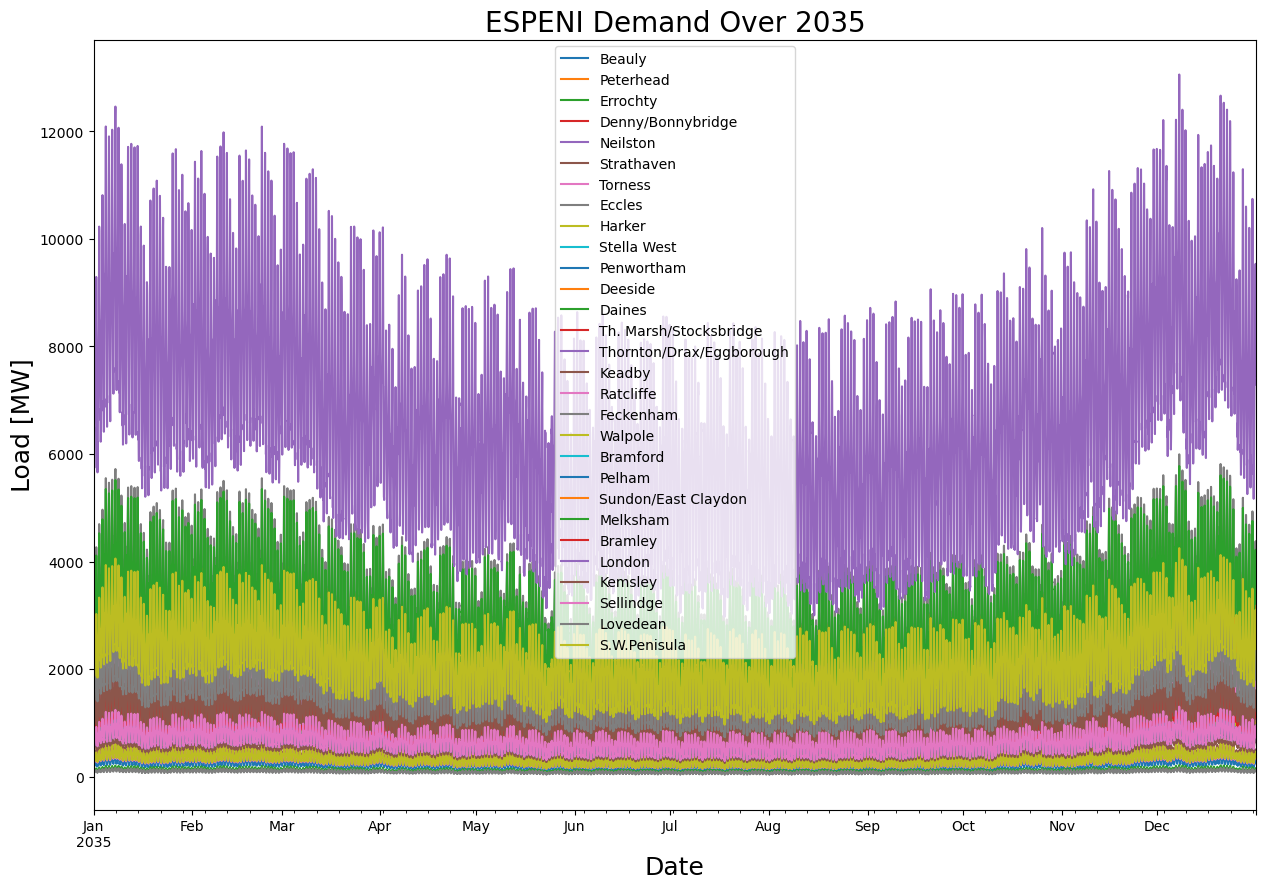

Demand data has been saved to LOPF_data/demand_data_over_time.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct the file path as needed
file_path = 'LOPF_data/loads-p_set.csv'

# Read the loads data from the CSV file
df_loads = pd.read_csv(file_path, index_col=0)

# Convert the index to datetime for accurate plotting
df_loads.index = pd.to_datetime(df_loads.index)

# Save the demand data to a new CSV file
output_file_path = 'LOPF_data/demand_data_over_time.csv'
df_loads.to_csv(output_file_path)

# Plot the load data
df_loads.plot(linestyle='-', figsize=(15, 10))

# Customize the plot
plt.title('ESPENI Demand Over 2035', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

# Display the plot
plt.show()

print(f"Demand data has been saved to {output_file_path}")


In [11]:
df_loads['Total'] = df_loads.sum(axis=1)

Text(0, 0.5, 'Load [MW]')

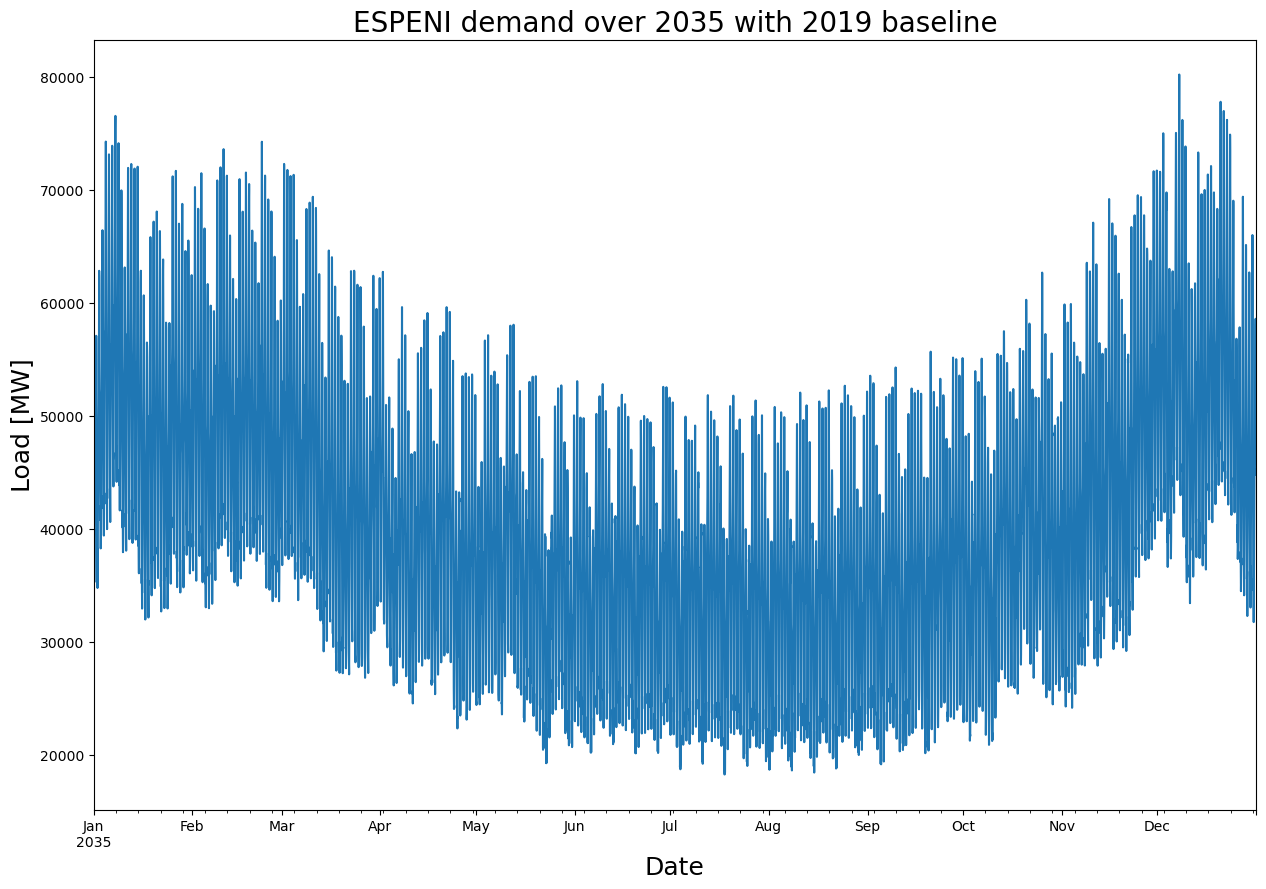

In [12]:
df_loads['Total'].plot(linestyle='-', figsize=(15,10))
plt.title('ESPENI demand over 2035 with 2019 baseline', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [14]:
df_FES = pd.read_excel(
            '../data/FES2021/FES 2021 Data Workbook V04.xlsx',
            sheet_name='ED1', header=4, dtype=str)
df_FES_demand = df_FES.loc[df_FES['Data item'] == 'GBFES System Demand: Total']
scenario = 'Steady Progression'
df_FES_demand = df_FES_demand.loc[df_FES_demand['Scenario'] == scenario]
date = str(year) + '-01-01 00:00:00'
df_FES_demand.columns = df_FES_demand.columns.astype(str)
# future demand in GWh/yr
future_demand = df_FES_demand[date].values[0]
print(future_demand + ' GWh/year' + ' future total system demand in ' + str(year) + ' from FES2021 workbook')

358447 GWh/year future total system demand in 2035 from FES2021 workbook


In [15]:
print(str(round(df_loads['Total'].sum() / 2000, 0)) + ' GWh/year' + ' future total system demand in ' + str(year) + ' from checking dataframe by summing')

358447.0 GWh/year future total system demand in 2035 from checking dataframe by summing


In [16]:
#peak loads in 2021

In [17]:
# Leading the way, 2050 Electricity S ystem ACS (Average Cold Spell) Peak Demand GW
peak_FES = 94.7

In [18]:
df_loads.max()

Beauly                        436.003660
Peterhead                     676.061906
Errochty                      215.957586
Denny/Bonnybridge            1922.905778
Neilston                     2278.835814
Strathaven                    693.406282
Torness                       601.058558
Eccles                        171.691764
Harker                        632.031473
Stella West                  3836.819711
Penwortham                   2116.909111
Deeside                      4334.128297
Daines                       4396.485121
Th. Marsh/Stocksbridge       3680.657600
Thornton/Drax/Eggborough     3194.507157
Keadby                       1138.414759
Ratcliffe                    2937.894639
Feckenham                    5993.844833
Walpole                      1408.868233
Bramford                     2106.484467
Pelham                       1307.074650
Sundon/East Claydon          4347.880808
Melksham                     5776.434401
Bramley                      1970.824942
London          

In [19]:
df_loads_smoothed = df_loads.rolling(48, min_periods=1).mean()
df_loads_smoothed.max()

Beauly                        324.691571
Peterhead                     503.462750
Errochty                      160.823438
Denny/Bonnybridge            1431.986366
Neilston                     1697.047174
Strathaven                    516.379093
Torness                       447.607819
Eccles                        127.858717
Harker                        470.673323
Stella West                  2857.276512
Penwortham                   1576.460490
Deeside                      3227.621811
Daines                       3274.058887
Th. Marsh/Stocksbridge       2740.982716
Thornton/Drax/Eggborough     2378.946877
Keadby                        847.776543
Ratcliffe                    2187.847744
Feckenham                    4463.611363
Walpole                      1049.183025
Bramford                     1568.697266
Pelham                        973.377427
Sundon/East Claydon          3237.863295
Melksham                     4301.705992
Bramley                      1467.671728
London          

In [20]:
#print dataframe
print("df_loads:")
print(df_loads)

df_loads:
                         Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  250.656960  388.665595  124.153251        1105.471719   
2035-01-01 00:30:00  231.001928  358.188744  114.417889        1018.787185   
2035-01-01 01:00:00  218.311319  338.510843  108.132086         962.817828   
2035-01-01 01:30:00  212.585134  329.631891  105.295842         937.563648   
2035-01-01 02:00:00  212.134098  328.932519  105.072438         935.574444   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  274.392575  425.469748  135.909772        1210.152842   
2035-12-31 22:00:00  258.902375  401.450835  128.237299        1141.836454   
2035-12-31 22:30:00  250.384682  388.243405  124.018389        1104.270896   
2035-12-31 23:00:00  248.839497  385.847459  123.253041        1097.456167   
2035-12-31 23:30:00  248.839497  385.847459  123.25304

In [21]:
print("df_loads_smoothed:")
print(df_loads_smoothed)

df_loads_smoothed:
                         Beauly   Peterhead    Errochty  Denny/Bonnybridge  \
name                                                                         
2035-01-01 00:00:00  250.656960  388.665595  124.153251        1105.471719   
2035-01-01 00:30:00  240.829444  373.427169  119.285570        1062.129452   
2035-01-01 01:00:00  233.323402  361.788394  115.567742        1029.025577   
2035-01-01 01:30:00  228.138835  353.749268  112.999767        1006.160095   
2035-01-01 02:00:00  224.937888  348.785918  111.414301         992.042965   
...                         ...         ...         ...                ...   
2035-12-31 21:30:00  244.483555  379.093190  121.095493        1078.245170   
2035-12-31 22:00:00  243.704104  377.884583  120.709422        1074.807561   
2035-12-31 22:30:00  243.120531  376.979701  120.420372        1072.233829   
2035-12-31 23:00:00  242.851326  376.562276  120.287032        1071.046555   
2035-12-31 23:30:00  242.871678  376.593833  

In [22]:
print("Columns in df_loads:")
print(df_loads.columns)

print("\nColumns in df_loads_smoothed:")
print(df_loads_smoothed.columns)


Columns in df_loads:
Index(['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston',
       'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Total'],
      dtype='object')

Columns in df_loads_smoothed:
Index(['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston',
       'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Total'],
      dtype='object'

Columns in df_loads:
Index(['Total', 'OtherLoad'], dtype='object')

Columns in df_loads_smoothed:
Index(['Total', 'OtherLoad'], dtype='object')

First few rows of df_loads:
                         Total  OtherLoad
2021-01-01 00:00:00  76.222153  47.822192
2021-01-01 01:00:00  17.354445   8.101280
2021-01-01 02:00:00  21.266177  45.725843
2021-01-01 03:00:00  63.420384  46.906684
2021-01-01 04:00:00  33.935063  47.253436

First few rows of df_loads_smoothed:
                         Total  OtherLoad
2021-01-01 00:00:00  76.222153  47.822192
2021-01-01 01:00:00  46.788299  27.961736
2021-01-01 02:00:00  38.280925  33.883105
2021-01-01 03:00:00  44.565790  37.139000
2021-01-01 04:00:00  42.439645  39.161887


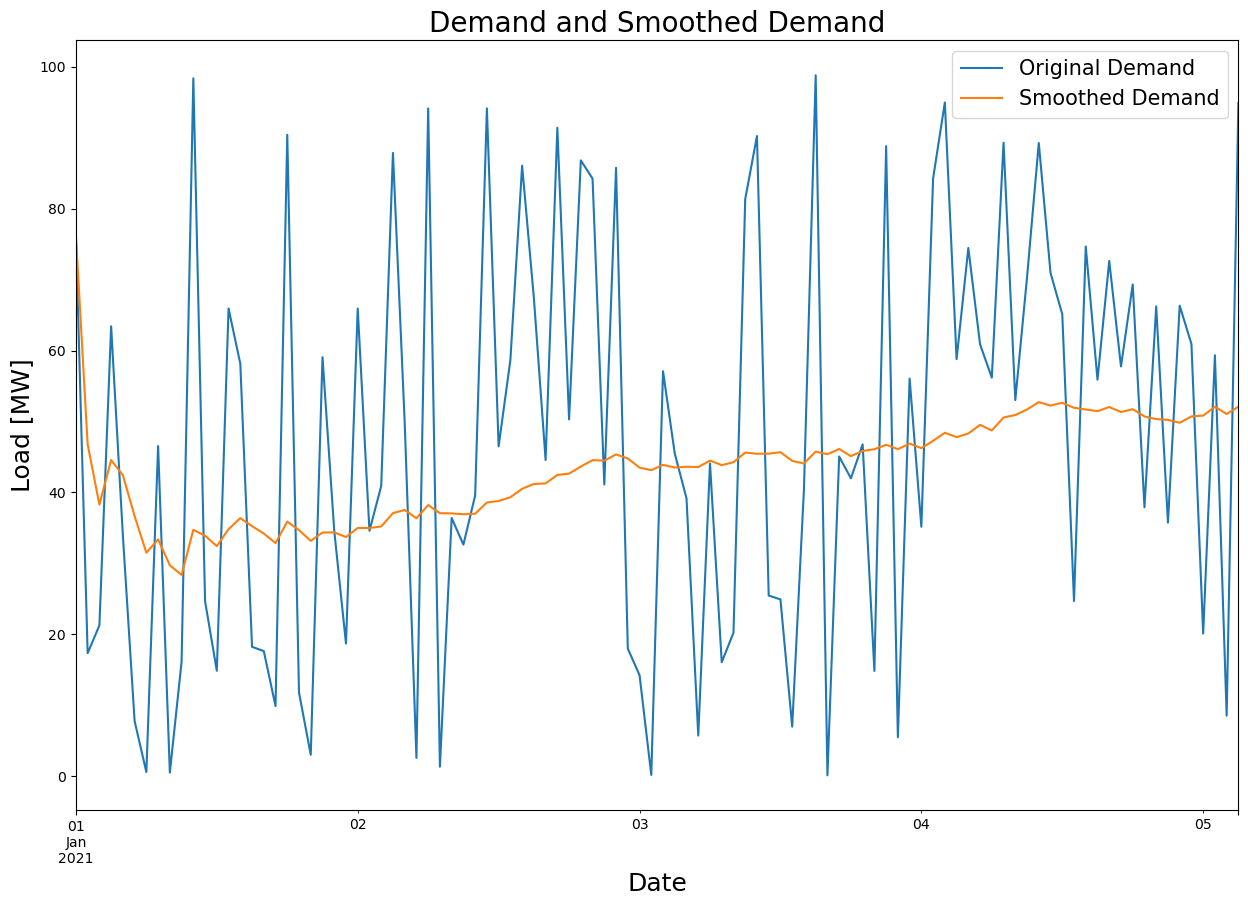

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with some load data
dates = pd.date_range(start='2021-01-01', periods=100, freq='H')
data = {
    'Total': np.random.rand(100) * 100,  # Load data in MW
    'OtherLoad': np.random.rand(100) * 50  # Another column of load data
}
df_loads = pd.DataFrame(data, index=dates)

# Applying rolling mean with window size of 48 and minimum periods of 1
df_loads_smoothed = df_loads.rolling(48, min_periods=1).mean()

# Inspecting column names and data
print("Columns in df_loads:")
print(df_loads.columns)

print("\nColumns in df_loads_smoothed:")
print(df_loads_smoothed.columns)

print("\nFirst few rows of df_loads:")
print(df_loads.head())

print("\nFirst few rows of df_loads_smoothed:")
print(df_loads_smoothed.head())

# Plotting the original and smoothed load data
if 'Total' in df_loads.columns and 'Total' in df_loads_smoothed.columns:
    plt.figure(figsize=(15, 10))

    # Plot original load
    df_loads['Total'].plot(linestyle='-', label='Original Demand')

    # Plot smoothed load
    df_loads_smoothed['Total'].plot(linestyle='-', label='Smoothed Demand')

    # Adding title and labels
    plt.title('Demand and Smoothed Demand', fontsize=20)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Load [MW]', fontsize=18)

    # Adding a legend to differentiate between the two plots
    plt.legend(fontsize=15)

    # Display the plot
    plt.show()
else:
    print("Column 'Total' not found in one or both DataFrames.")


In [24]:
import pandas as pd
import numpy as np

# Sample DataFrame with some load data
dates = pd.date_range(start='2021-01-01', periods=100, freq='H')
data = {
    'Total': np.random.rand(100) * 100,  # Load data in MW
    'OtherLoad': np.random.rand(100) * 50  # Another column of load data
}
df_loads = pd.DataFrame(data, index=dates)

# Downloading the DataFrame to a CSV file
df_loads.to_csv('df_loads.csv', index=True)


Text(0, 0.5, 'Load [MW]')

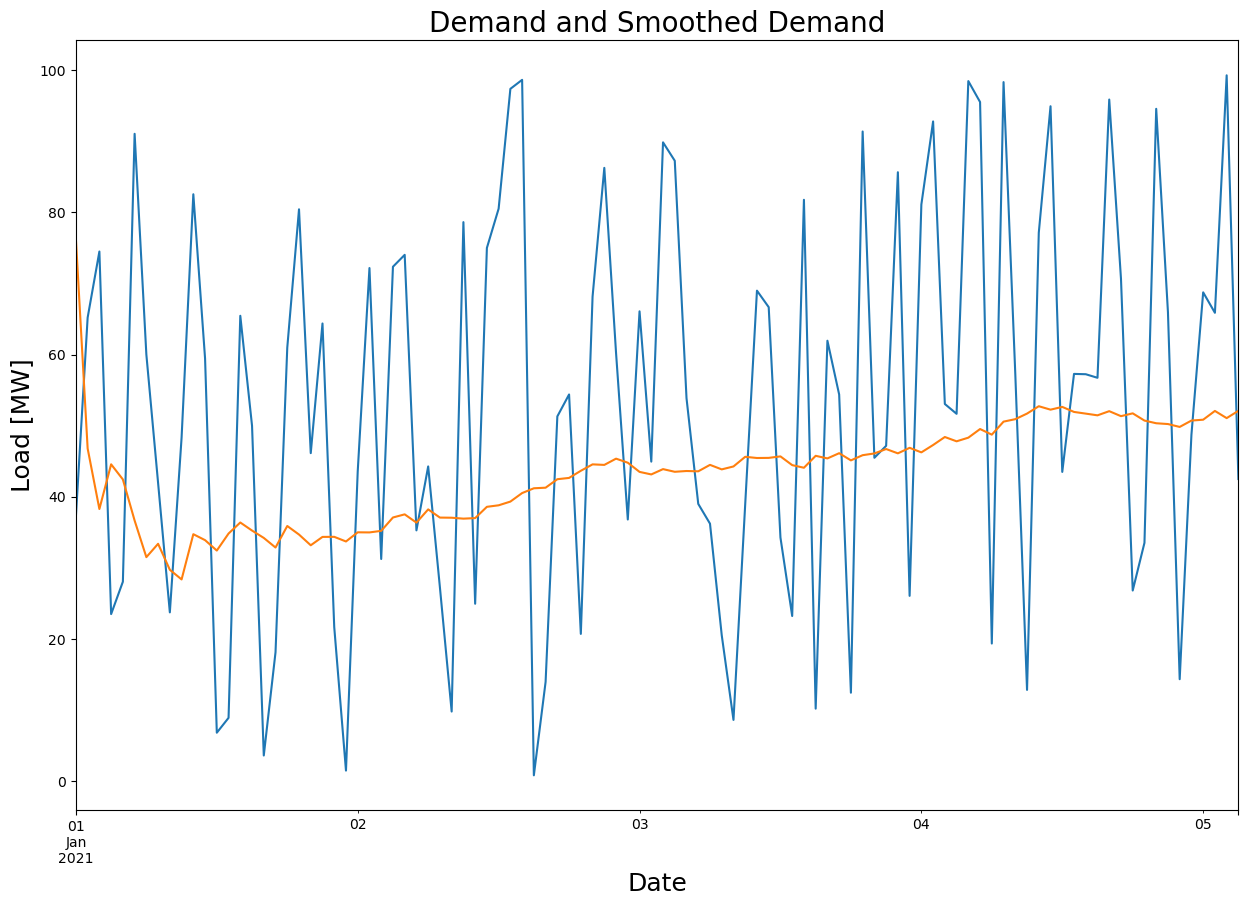

In [25]:
df_loads['Total']
date_from = '2021-01-01 00:00:00'
date_to = '2021-02-08 00:00:00'

df_loads['Total'].loc[date_from:date_to].plot(linestyle='-', figsize=(15,10))
df_loads_smoothed['Total'].loc[date_from:date_to].plot(linestyle='-', figsize=(15,10))
plt.title('Demand and Smoothed Demand', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load [MW]', fontsize=18)

In [26]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [27]:
from data_reader_writer import data_writer
import marginal_costs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
year = 2035

In [29]:
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00'
# time step as fraction of hour
time_step = 0.5
if year > 2020:
    data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=2012, scenario='Falling Short', FES=2022)
if year <= 2020:
    data_writer(start, end, time_step, year, demand_dataset='historical')

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_point = {'lon': df['x'][i], 'lat': df['y'][i]}
C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\generators.py:795: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.index = pd.to_datetime(df.index, infer_datetime_format=True)
C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To ac

In [30]:
df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
df_generators

carrier  \
name                                                                
West Burton                                                  Coal   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   
Beatrice Demonstrator                               Wind Offshore   
Burbo Bank                                          Wind Offshore   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   
...                                                           ...   
Unmet Load London                                      Unmet Load   
Unmet Load Kemsley                                     Unmet Load   
Unmet Load Sellindge                                   Unmet Load   
Unmet Load Lovedean                                    Unmet Load   
Unmet Load S.W.Penisula                                Unmet Load   

                                                                  type  \
name                                                                     
West Burton                                         Conventional steam   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator       Wind Offshore   
Beatrice Demonstrator                                    Wind Offshore   
Burbo Bank                                               Wind Offshore   
Gunfleet Sands - (Demo) Extension                        Wind Offshore   
...                                                                ...   
Unmet Load London                                           Unmet Load   
Unmet Load Kemsley                                          Unmet Load   
Unmet Load Sellindge                                        Unmet Load   
Unmet Load Lovedean                                         Unmet Load   
Unmet Load S.W.Penisula                                     Unmet Load   

                                                           p_nom  \
name                                                               
West Burton                                         0.000000e+00   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  1.446484e+01   
Beatrice Demonstrator                               4.821614e+00   
Burbo Bank                                          1.267514e+02   
Gunfleet Sands - (Demo) Extension                   1.690019e+01   
...                                                          ...   
Unmet Load London                                   1.000000e+09   
Unmet Load Kemsley                                  1.000000e+09   
Unmet Load Sellindge                                1.000000e+09   
Unmet Load Lovedean                                 1.000000e+09   
Unmet Load S.W.Penisula                             1.000000e+09   

                                                             bus  \
name                                                               
West Burton                                               Keadby   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator     Peterhead   
Beatrice Demonstrator                                  Peterhead   
Burbo Bank                                               Deeside   
Gunfleet Sands - (Demo) Extension                       Bramford   
...                                                          ...   
Unmet Load London                                         London   
Unmet Load Kemsley                                       Kemsley   
Unmet Load Sellindge                                   Sellindge   
Unmet Load Lovedean                                     Lovedean   
Unmet Load S.W.Penisula                             S.W.Penisula   

                                                    Turbine Capacity (MW)  \
name                                                                        
West Burton                                                           NaN   
Hywind Scotland Pilot Park (Hywind 2) Demonstrator                    NaN   
Beatrice Demonstrator                                                 NaN   
Burbo Bank                                

In [31]:
df_generators.loc[df_generators['carrier'] == 'Wind Offshore']

carrier  \
name                                                                
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   
Beatrice Demonstrator                               Wind Offshore   
Burbo Bank                                          Wind Offshore   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   
Gunfleet Sands II                                   Wind Offshore   
...                                                           ...   
NE7                                                 Wind Offshore   
NE8                                                 Wind Offshore   
E1                                                  Wind Offshore   
E2                                                  Wind Offshore   
E3                                                  Wind Offshore   

                                                             type       p_nom  \
name                                                                            
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Wind Offshore   14.464841   
Beatrice Demonstrator                               Wind Offshore    4.821614   
Burbo Bank                                          Wind Offshore  126.751421   
Gunfleet Sands - (Demo) Extension                   Wind Offshore   16.900189   
Gunfleet Sands II                                   Wind Offshore   91.261027   
...                                                           ...         ...   
NE7                                                 Floating Wind  824.495940   
NE8                                                 Floating Wind  274.831980   
E1                                                  Floating Wind  824.495940   
E2                                                  Floating Wind  549.663960   
E3                                                  Floating Wind  274.831980   

                                                          bus  \
name                                                            
Hywind Scotland Pilot Park (Hywind 2) Demonstrator  Peterhead   
Beatrice Demonstrator                               Peterhead   
Burbo Bank                                            Deeside   
Gunfleet Sands - (Demo) Extension                    Bramford   
Gunfleet Sands II                                    Bramford   
...                                                       ...   
NE7                                                 Peterhead   
NE8                                                 Peterhead   
E1                                                  Peterhead   
E2                                                  Peterhead   
E3                                                  Peterhead   

                                                    Turbine Capacity (MW)  \
name                                                                        
Hywind Scotland Pilot Park (Hywind 2) Demonstrator                    NaN   
Beatrice Demonstrator                                                 NaN   
Burbo Bank                                                            NaN   
Gunfleet Sands - (Demo) Extension                                     NaN   
Gunfleet Sands II                                                     NaN   
...                                                                   ...   
NE7                                                                  15.0   
NE8                                                                  15.0   
E1                                                                   15.0   
E2                                                                   15.0   
E3                                                                   15.0   

                                                    marginal_cost  \
name                                                                
Hywind Scotland Pilot Park (Hywind 2) Demonstrator            0.0   
Beatrice Demonstrator                              

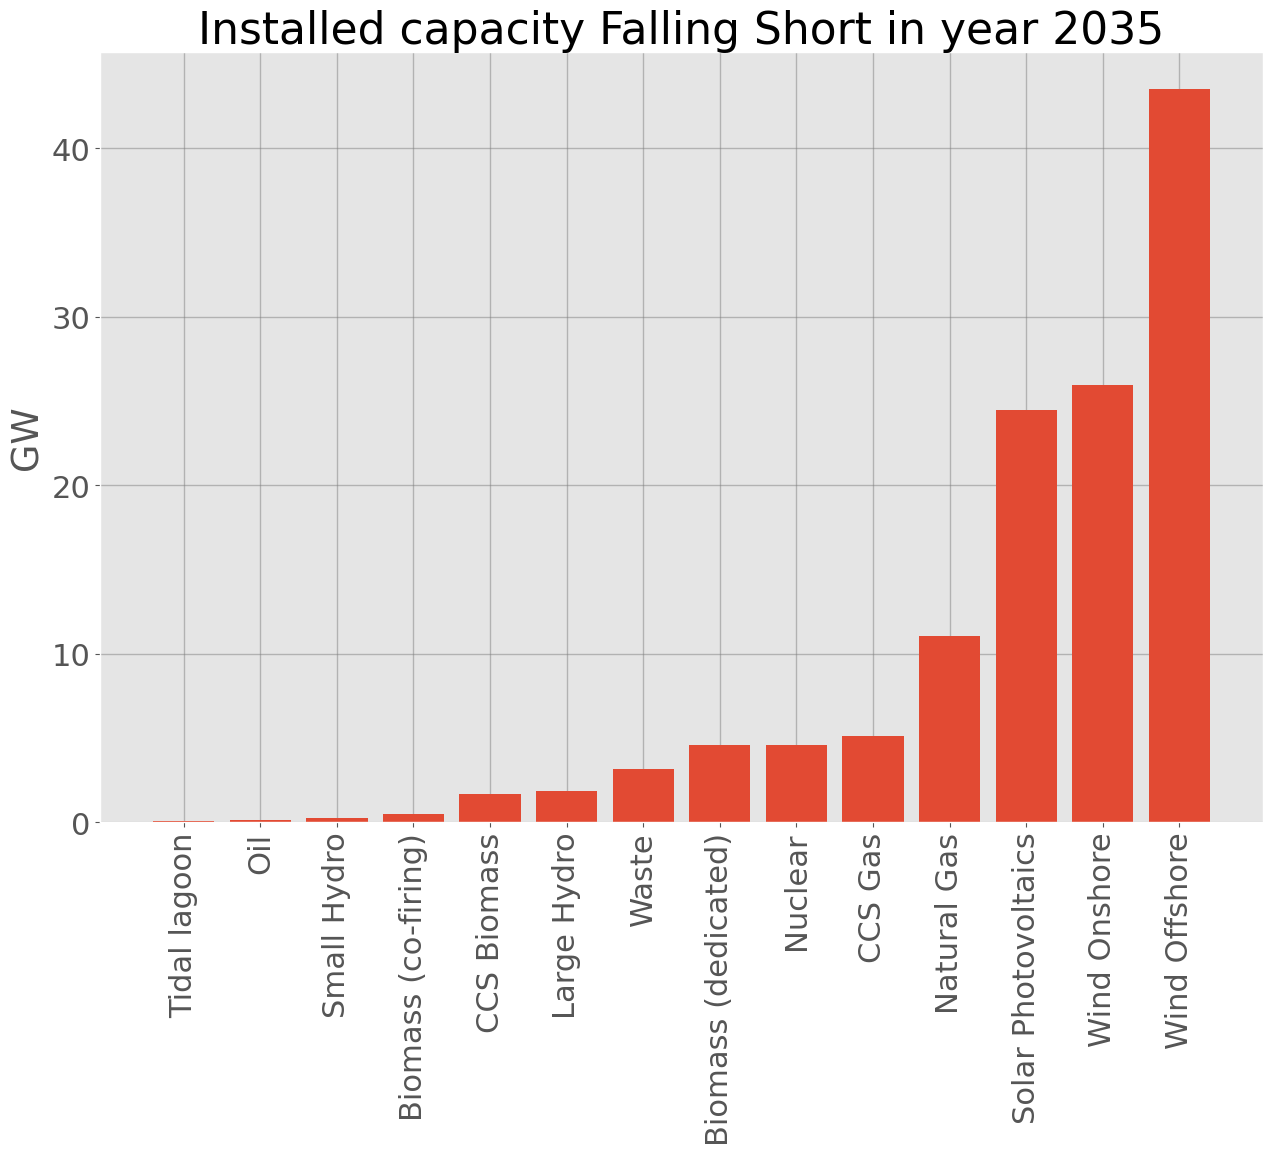

In [103]:
generators_p_nom = df_generators.p_nom.groupby(
    df_generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,10))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity Falling Short in year ' + str(year))
plt.show()

In [33]:
generators_p_nom

carrier
Tidal lagoon              79.000000
Oil                      135.282001
Small Hydro              240.162645
Biomass (co-firing)      476.000000
CCS Biomass             1650.000008
Large Hydro             1832.785364
Waste                   3145.733001
Biomass (dedicated)     4558.270000
Nuclear                 4570.000000
CCS Gas                 5109.999971
Natural Gas            11027.194504
Solar Photovoltaics    24437.940000
Wind Onshore           25930.040000
Wind Offshore          43528.980000
Name: p_nom, dtype: float64

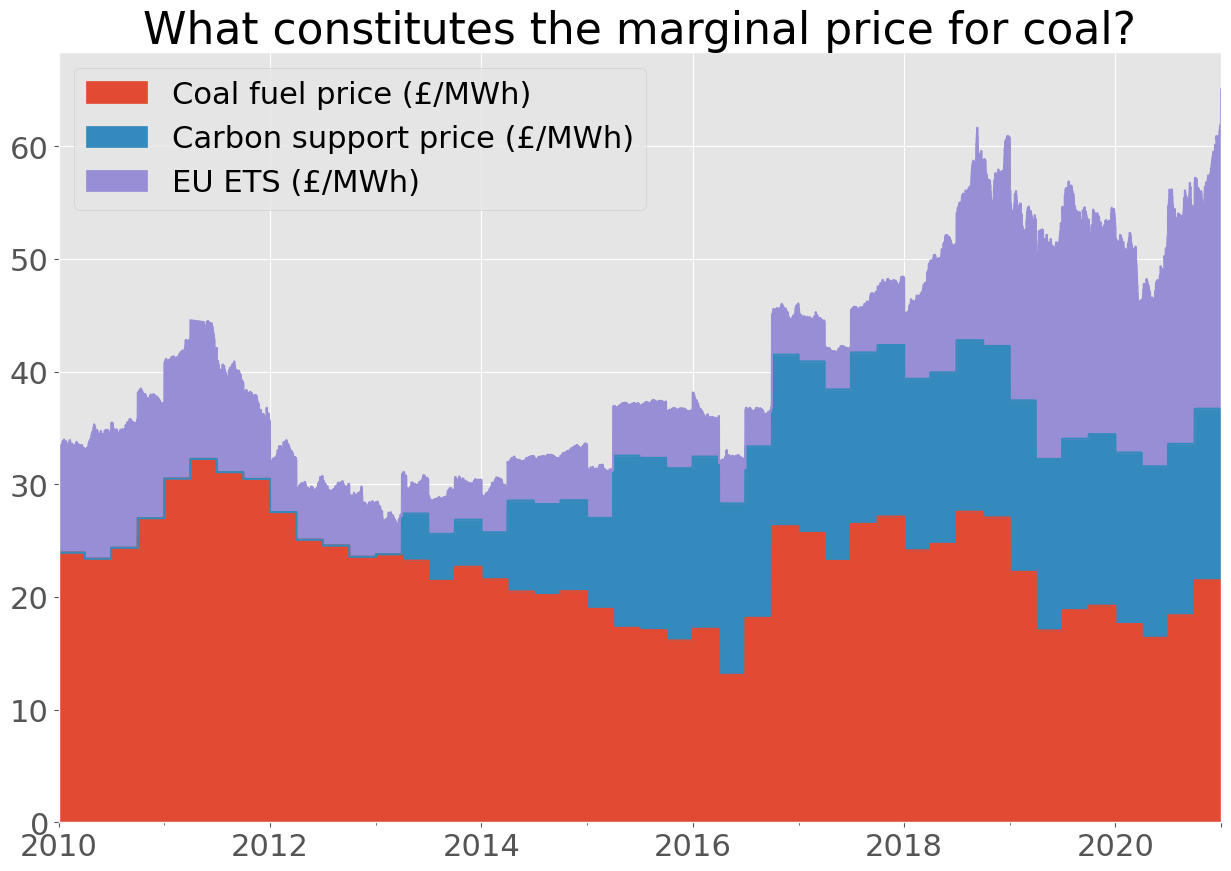

In [34]:
df = pd.read_excel('../data/marginal_cost_data.xlsx', sheet_name=None)

fuel_prices = marginal_costs.fuel_prices_df(df)
carbon_support_price = marginal_costs.carbon_support_price_df(df)
EU_ETS = marginal_costs.EU_ETS_df(df)
EU_ETS.set_index(fuel_prices.index, inplace=True)

result = pd.concat([fuel_prices, carbon_support_price, EU_ETS], axis=1)

# exchange euros for pounds
exch = {2010: 0.8583,
        2011: 0.8678,
        2012: 0.8113,
        2013: 0.8492,
        2014: 0.8061,
        2015: 0.7263,
        2016: 0.8193,
        2017: 0.8766,
        2018: 0.8850,
        2019: 0.8773,
        2020: 0.8897}

for year in range(2010, 2021):
    result.loc[:, 'EU ETS (Euros/tonne)'].loc[str(year): str(year)] *= exch[year]
result.rename(
    columns={'EU ETS (Euros/tonne)': 'EU ETS (Pounds/tonne)'},
    inplace=True)

# these are from
# https://www.parliament.uk/globalassets/documents/post/postpn_383-carbon-footprint-electricity-generation.pdf
coal_emission_factor = 846
# really should be different between OCGT and CCGT
gas_emission_factor = 488
# need better reference for oil
# https://www.jcm.go.jp/cl-jp/methodologies/68/attached_document2
oil_emission_factor = 533

result.loc[:, 'Gas carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * gas_emission_factor / 10000
result.loc[:, 'Coal carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * coal_emission_factor / 10000
result.loc[:, 'Oil carbon tax (p/kWh)'] = (
    result['Carbon support price (Pounds/tonne)'] +
    result['EU ETS (Pounds/tonne)']) * oil_emission_factor / 10000

# converting to £/MWh
result.loc[:, 'Gas'] = (
    result['Gas carbon tax (p/kWh)'] +
    result['Gas (p/kWh)']) * 10
result.loc[:, 'Coal'] = (
    result['Coal carbon tax (p/kWh)'] +
    result['Coal (p/kWh)']) * 10
result.loc[:, 'Oil'] = (
    result['Oil carbon tax (p/kWh)'] +
    result['Oil (p/kWh)']) * 10

frame = {'Coal fuel price (£/MWh)': result['Coal (p/kWh)'] * 10,
         'Carbon support price (£/MWh)': result['Carbon support price (Pounds/tonne)'] * coal_emission_factor / 10000 * 10,
         'EU ETS (£/MWh)': result['EU ETS (Pounds/tonne)'] * coal_emission_factor / 10000 * 10}
df_coal = pd.DataFrame(frame)
df_coal.plot.area(figsize=(15,10))
plt.title('What constitutes the marginal price for coal?')
plt.show()

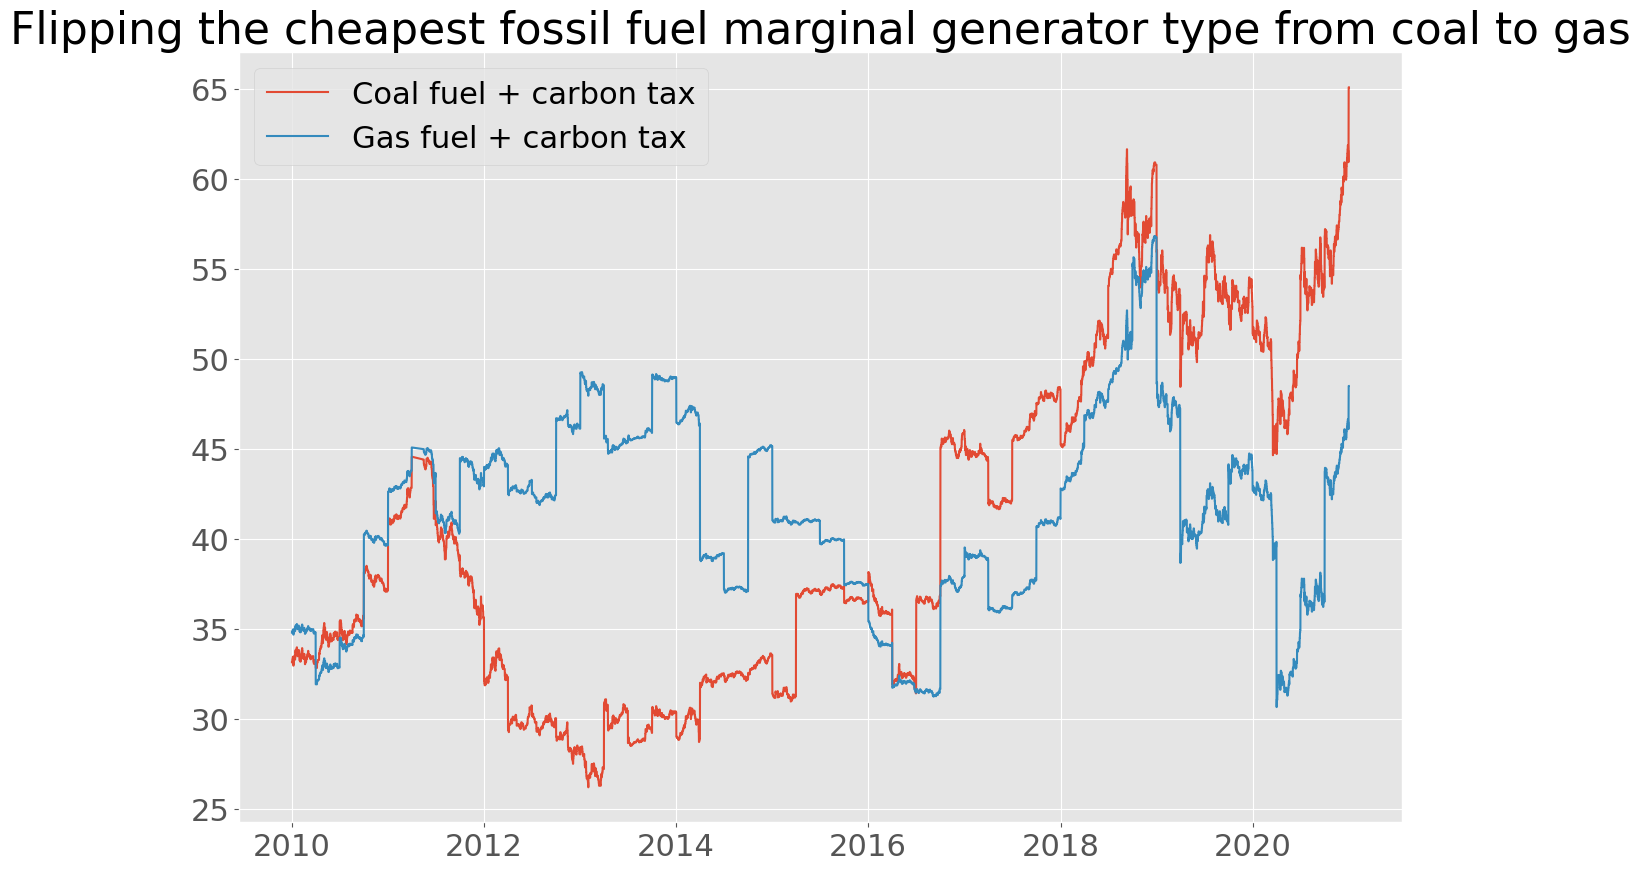

In [35]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(result['Coal'], label='Coal fuel + carbon tax')
plt.plot(result['Gas'], label='Gas fuel + carbon tax')
plt.legend(loc='best')
plt.title('Flipping the cheapest fossil fuel marginal generator type from coal to gas')
plt.show()

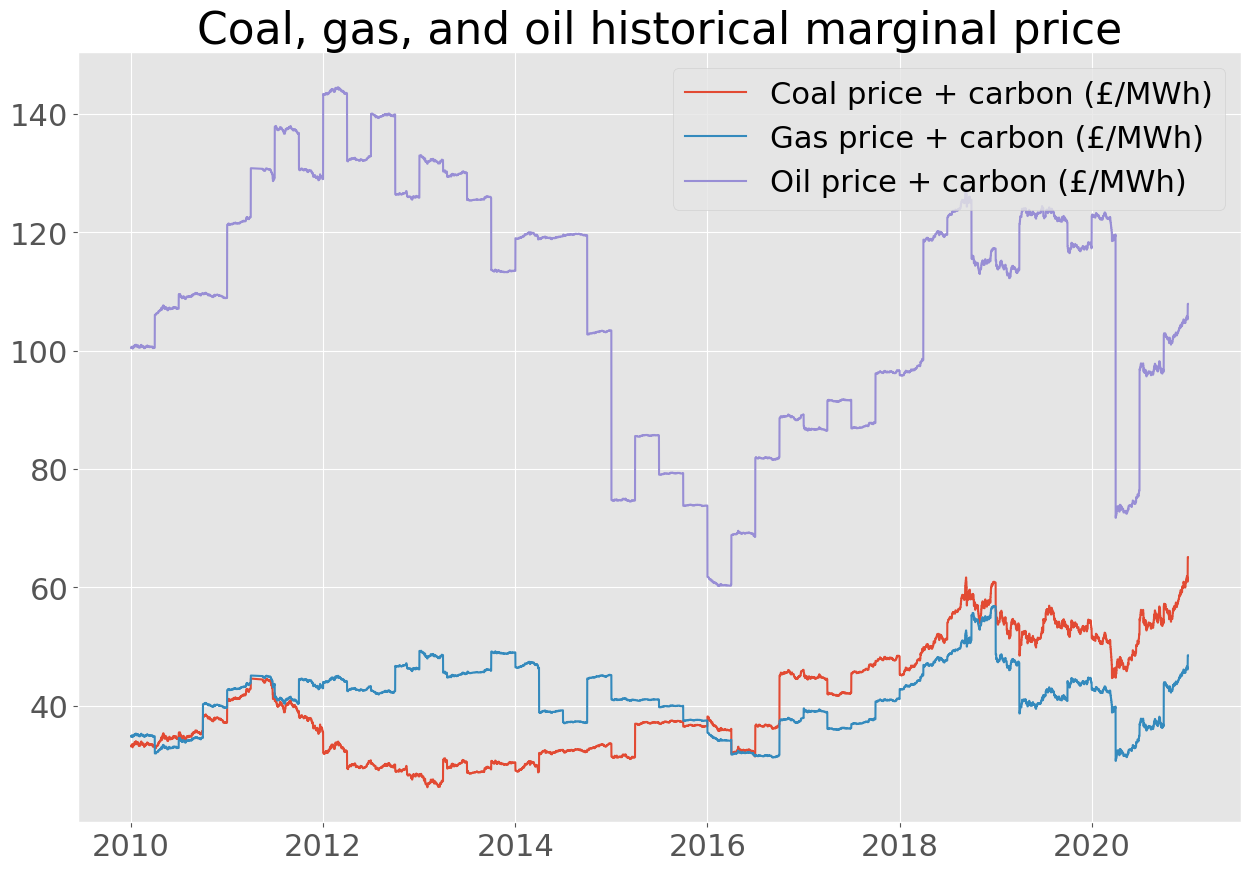

In [36]:
marginal_prices = result[['Coal', 'Gas', 'Oil']].copy()
plt.plot(marginal_prices)
plt.legend(['Coal price + carbon (£/MWh)', 'Gas price + carbon (£/MWh)', 'Oil price + carbon (£/MWh)'], loc='best')
plt.title('Coal, gas, and oil historical marginal price')
plt.show()

In [37]:
# add the future prices
FES = 2022
future_fuel_price = marginal_costs.future_fuel_prices_df(FES)
future_fuel_price = future_fuel_price.apply(pd.to_numeric, errors='coerce')
future_carbon_price = marginal_costs.future_carbon_prices_df(FES)
future_carbon_price = future_carbon_price.apply(pd.to_numeric, errors='coerce')

future_result = pd.concat([future_fuel_price, future_carbon_price], axis=1)

future_result.loc[:, 'Gas carbon tax (p/kWh)'] = (
    future_result['High case']) * gas_emission_factor / 10000
future_result.loc[:, 'Coal carbon tax (p/kWh)'] = (
    future_result['High case']) * coal_emission_factor / 10000
future_result.loc[:, 'Oil carbon tax (p/kWh)'] = (
    future_result['High case']) * oil_emission_factor / 10000

# converting to £/MWh
# gas is in p/therm, divide by 29.3 * 0.5 = 14.65, assume elec efficiency 50%
# this gets us to p/kWh, then * 10 to get £/MWh
future_result.loc[:, 'Gas'] = (
    future_result['Gas carbon tax (p/kWh)'] * 10 +
    future_result['Gas price'] * 10 / 14.65)
# coal is in USD per tonne, * 0.75 to get pounds
# one tonne can create 2.460 MWh electricity, divide by this
# to get £/MWh
# also a 1.4 fudge factor to get closer to 2020 price
future_result.loc[:, 'Coal'] = (
    future_result['Coal carbon tax (p/kWh)'] * 10 +
    future_result['Coal price'] * 1.4 * 0.8 / 2.460)
# oil is in $ per barrel, so * 0.75 to get pounds
# 1.7 MWh per barrel thermal, so *0.3 to get 0.85 MWh elec
# divide by this to get £/MWh
future_result.loc[:, 'Oil'] = (
    future_result['Oil carbon tax (p/kWh)'] * 10 +
    future_result['Oil price'] * 0.8 / 0.51)

marginal_prices2 = future_result[['Coal', 'Gas', 'Oil']].copy()

marginal_prices = pd.concat([marginal_prices, marginal_prices2], ignore_index=True) #pd.concat
marginal_prices

Coal         Gas         Oil
0        33.14282   34.786835  100.481909
1        33.14282   34.786835  100.481909
2        33.14282   34.786835  100.481909
3        33.14282   34.786835  100.481909
4        33.14282   34.786835  100.481909
...           ...         ...         ...
718795  162.66601  111.018724  144.796921
718796  162.66601  111.018724  144.796921
718797  162.66601  111.018724  144.796921
718798  162.66601  111.018724  144.796921
718799  162.66601  111.018724  144.796921

[718800 rows x 3 columns]

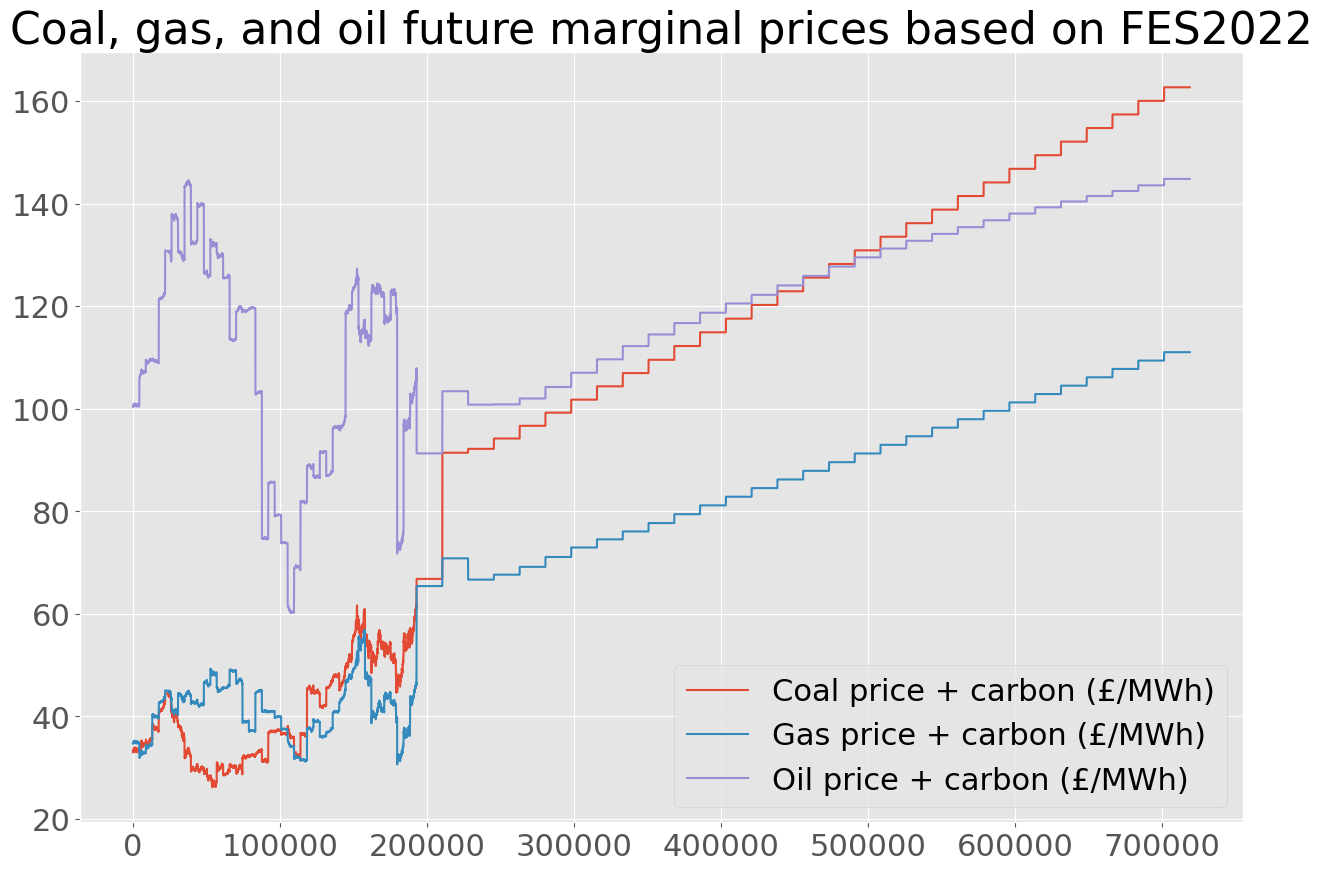

In [38]:
plt.plot(marginal_prices)
plt.legend(['Coal price + carbon (£/MWh)', 'Gas price + carbon (£/MWh)', 'Oil price + carbon (£/MWh)'], loc='best')
plt.title('Coal, gas, and oil future marginal prices based on FES2022')
plt.show()

In [46]:
#simulation for future 

In [47]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [48]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

In [49]:
# write csv files for import
start = '2035-01-01 00:00:00'
end = '2035-12-31 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 0.5

In [50]:
#scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
scenario = 'Falling Short'

In [51]:
year_baseline = 2012

In [52]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True,
                               networkmodel='Reduced', P2G=True)

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\generators.py:795: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Python\Great_Britain\PyPSA-GB\PyPSA-GB\distance_calculator.py:32:

In [53]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


In [54]:
very_high_value = 1e12
network.lines['s_nom'] = very_high_value

In [55]:
#very_high_value = 1e12
#network.links['p_nom'] = very_high_value

In [56]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

In [57]:
#running optimisation

In [58]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

C:\Users\rachm\AppData\Local\Temp\ipykernel_22308\886280260.py:1: DeprecatedWarning:

lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 248.85s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-04
Read LP format model from file C:\Users\rachm\AppData\Local\Temp\pypsa-problem-mzsbrvmg.lp
Reading time = 119.99 seconds
obj: 50807138 rows, 15838081 columns, 89437756 nonzeros
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1370P, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 50807138 rows, 15838081 columns and 89437756 nonzeros
Model fingerprint: 0x072ecbf9
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [5e-01, 5e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-06, 4e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 46689950 rows and 122641 columns (presolve time = 6s) ...
Presolve removed 46689950 rows and 20766

INFO:pypsa.linopf:Optimization successful. Objective value: 5.98e+15


('ok', 'optimal')

In [82]:
import pypsa

# Access the lines data
lines_data = network.lines

# Print the lines data
print(lines_data)

# Save lines data to a CSV file
lines_data.to_csv('lines_data.csv', index=False)

              bus0               bus1        r        x       b         s_nom  \
Line                                                                            
0           Beauly          Peterhead  0.01220  0.02000  0.0856  1.000000e+12   
1           Beauly           Errochty  0.00700  0.15000  0.0520  1.000000e+12   
2           Beauly          Peterhead  0.01220  0.02000  0.2844  1.000000e+12   
3           Beauly           Errochty  0.00700  0.15000  0.0520  1.000000e+12   
4        Peterhead  Denny/Bonnybridge  0.00040  0.06500  0.4454  1.000000e+12   
...            ...                ...      ...      ...     ...           ...   
94       Sellindge            Kemsley  0.00020  0.00503  0.1797  1.000000e+12   
95        Lovedean          Sellindge  0.00038  0.00711  0.2998  1.000000e+12   
96        Lovedean          Sellindge  0.00038  0.00711  0.2998  1.000000e+12   
97    S.W.Penisula           Lovedean  0.00051  0.00796  0.3400  1.000000e+12   
98    S.W.Penisula          

In [83]:
# Access the lines data
links_data = network.links

# Print the lines data
print(links_data)

                     bus0          bus1 carrier   p_nom  marginal_cost  \
Link                                                                     
BritNed       Netherlands       Kemsley      DC   810.0           20.0   
EastWest          Ireland       Deeside      DC   486.0            7.0   
Moyle          N. Ireland      Neilston      DC   486.0            7.0   
Nemo              Belgium     Sellindge      DC   810.0           20.0   
IFA               France1     Sellindge      DC  1620.0           15.0   
IFA2              France2      Lovedean      DC   810.0           15.0   
NSL                Norway   Stella West      DC  1134.0            1.0   
ElecLink          France1     Sellindge      DC   810.0           15.0   
Viking Link       Denmark       Walpole      DC  1134.0            7.0   
Greenlink        Ireland2      Melksham      DC   405.0            7.0   
GridLink          France1       Kemsley      DC  1134.0           15.0   
NeuConnect        Germany       Kemsle

In [84]:
# Access the lines data
buses_data = network.buses

# Print the lines data
print(buses_data)

                          v_nom carrier         x          y type unit  \
Bus                                                                      
Beauly                    275.0      AC -4.533299  57.469876             
Peterhead                 275.0      AC -1.804331  57.484481             
Errochty                  275.0      AC -4.054907  56.724571             
Denny/Bonnybridge         275.0      AC -3.725282  56.109237             
Neilston                  400.0      AC -4.414788  55.808831             
Strathaven                400.0      AC -3.880268  55.753988             
Torness                   400.0      AC -2.507448  55.922401             
Eccles                    400.0      AC -2.229827  55.677255             
Harker                    400.0      AC -2.847820  54.931176             
Stella West               400.0      AC -1.667840  54.987162             
Penwortham                400.0      AC -2.679880  53.776910             
Deeside                   400.0      A

In [85]:
#power output by generation type

C:\Users\rachm\AppData\Local\Temp\ipykernel_22308\368247854.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\rachm\AppData\Local\Temp\ipykernel_22308\368247854.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



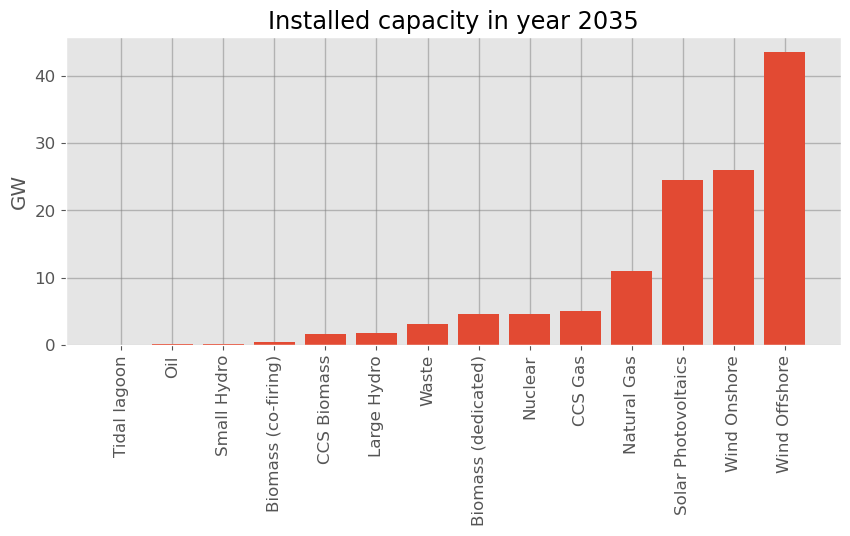

In [86]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]

p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Text(0.5, 0, '')

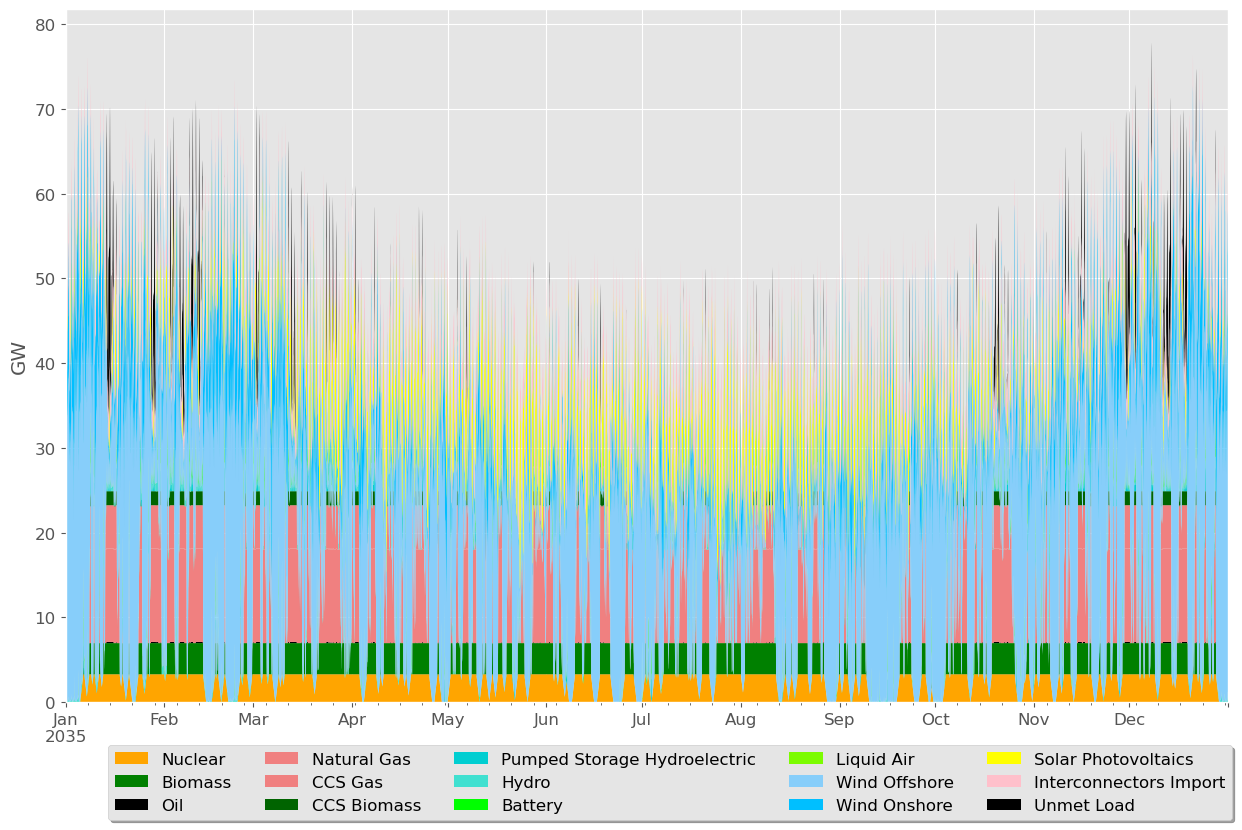

In [87]:
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

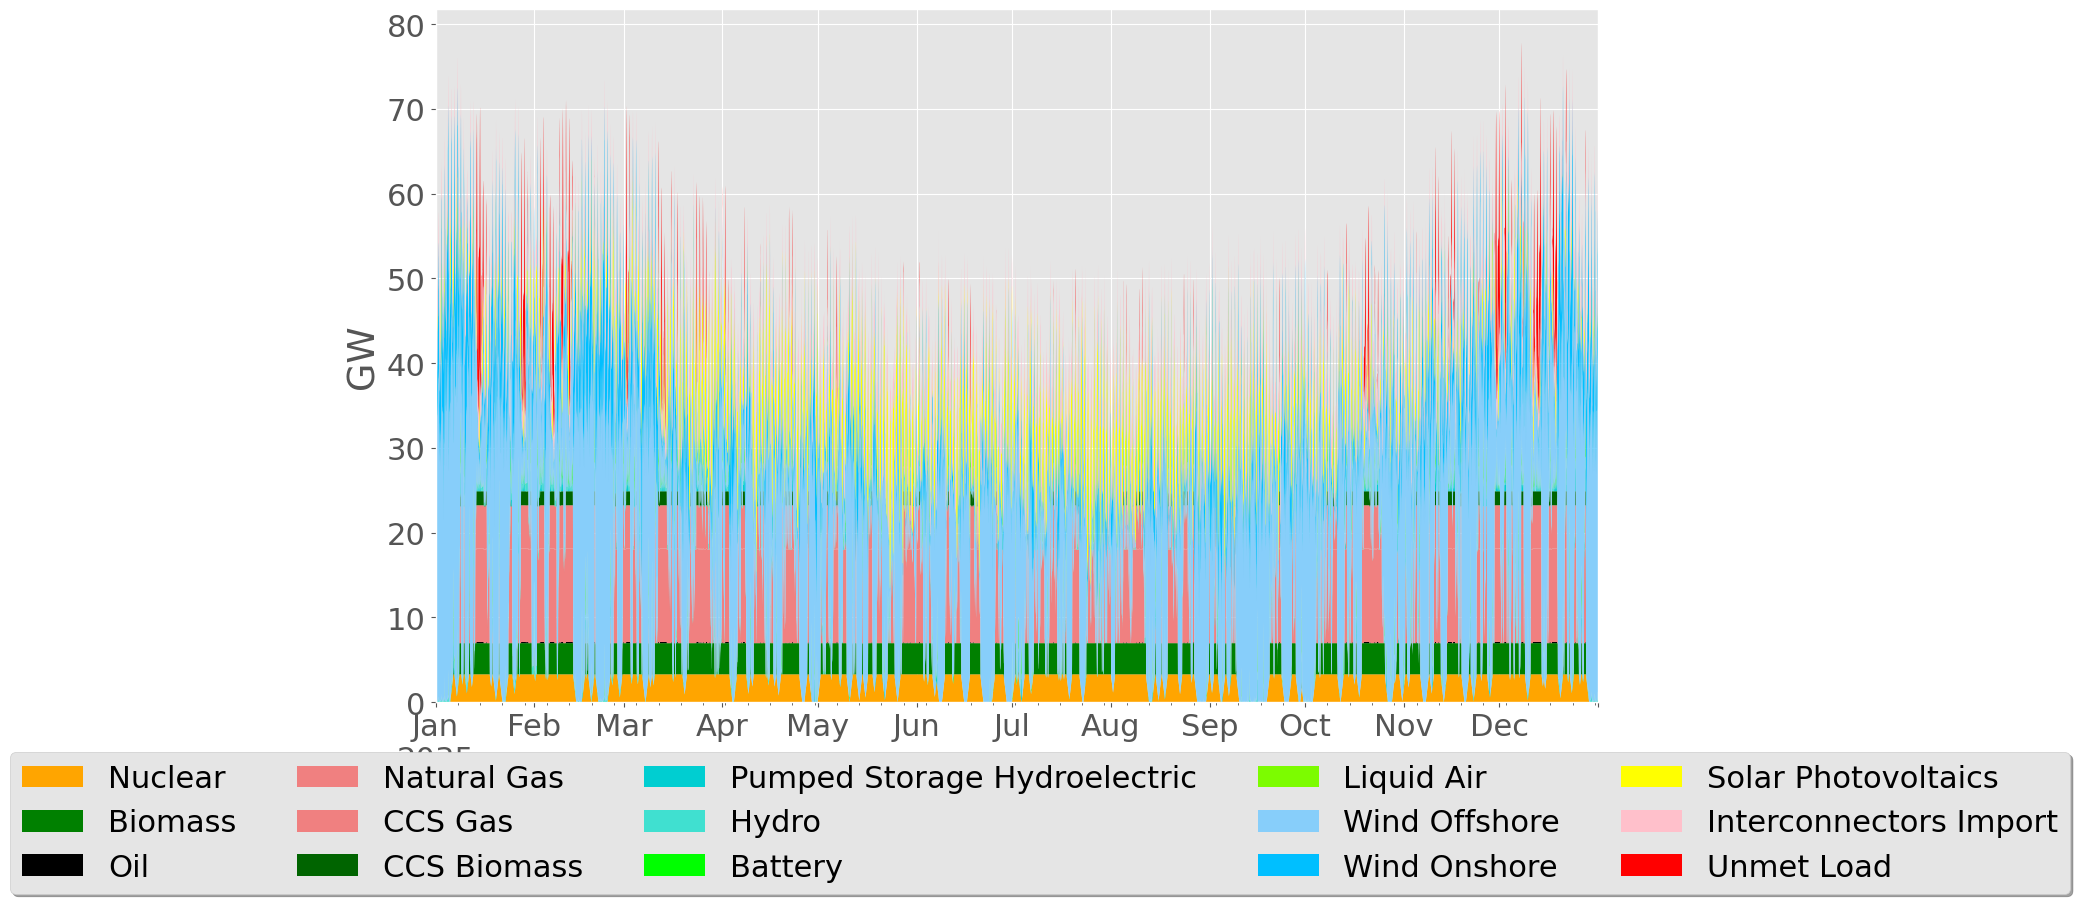

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `network` is an already defined object with necessary attributes

# Group power generation by carrier type and sum across all time steps
p_by_carrier = network.generators_t.p.T.groupby(network.generators.carrier).sum().T

# Group storage power by carrier type and sum
storage_by_carrier = network.storage_units_t.p.T.groupby(network.storage_units.carrier).sum().T

# Set negative storage values (discharging) to zero
storage_by_carrier[storage_by_carrier < 0] = 0

# Combine generation and storage data
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# Calculate interconnector imports (positive values)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

# Calculate interconnector exports (negative values)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Group biomass data together
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# Rename hydro and interconnector columns
p_by_carrier = p_by_carrier.rename(columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(columns={'Interconnector': 'Interconnectors Import'})

# Save the data to CSV
p_by_carrier.to_csv('power_generation_by_carrier.csv', index=True)

# Define colors for each carriermake adjustmen
colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'red',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

# Filter columns for plotting
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

# Drop columns with maximum values less than 50
p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

# Create the area plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Adjust the plot layout and add legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")
ax.set_xlabel("")
plt.show()


In [89]:
import pypsa
import pandas as pd


# Get the generator outputs for each snapshot
generators_p = network.generators_t.p

# Get the buses data to map each generator to its bus
generators = network.generators

# Create a DataFrame to store the generation at each bus
generation_at_buses = pd.DataFrame(index=generators_p.index)

# Sum the generation at each bus for each snapshot
for bus in network.buses.index:
    # Find all generators connected to the bus
    connected_generators = generators[generators['bus'] == bus].index
    # Sum the generation from these generators
    generation_at_buses[bus] = generators_p[connected_generators].sum(axis=1)

# Print the generation at each bus
print(generation_at_buses)

# Save the generation at each bus to a CSV file
generation_at_buses.to_csv('generation_at_buses.csv', index=True)


                          Beauly    Peterhead    Errochty  Denny/Bonnybridge  \
snapshot                                                                       
2035-01-01 00:00:00     0.000000     0.000000    0.000000         607.165064   
2035-01-01 00:30:00     0.000000     0.000000    0.000000           0.000000   
2035-01-01 01:00:00     0.000000     0.000000    0.000000           0.000000   
2035-01-01 01:30:00     0.000000     0.000000    0.000000           0.000000   
2035-01-01 02:00:00     0.000000     0.000000    0.000000           0.000000   
...                          ...          ...         ...                ...   
2035-12-31 21:30:00  5260.478201  4940.642773  480.999051         350.729405   
2035-12-31 22:00:00  4377.885605  6265.610643  478.601795         369.016443   
2035-12-31 22:30:00  5134.311862  6256.163842  481.584491         381.543417   
2035-12-31 23:00:00  5311.780409  6308.839440  489.057401         388.297242   
2035-12-31 23:30:00  5316.837871  6308.8

In [90]:
#plotting storage

Text(0.5, 0, '')

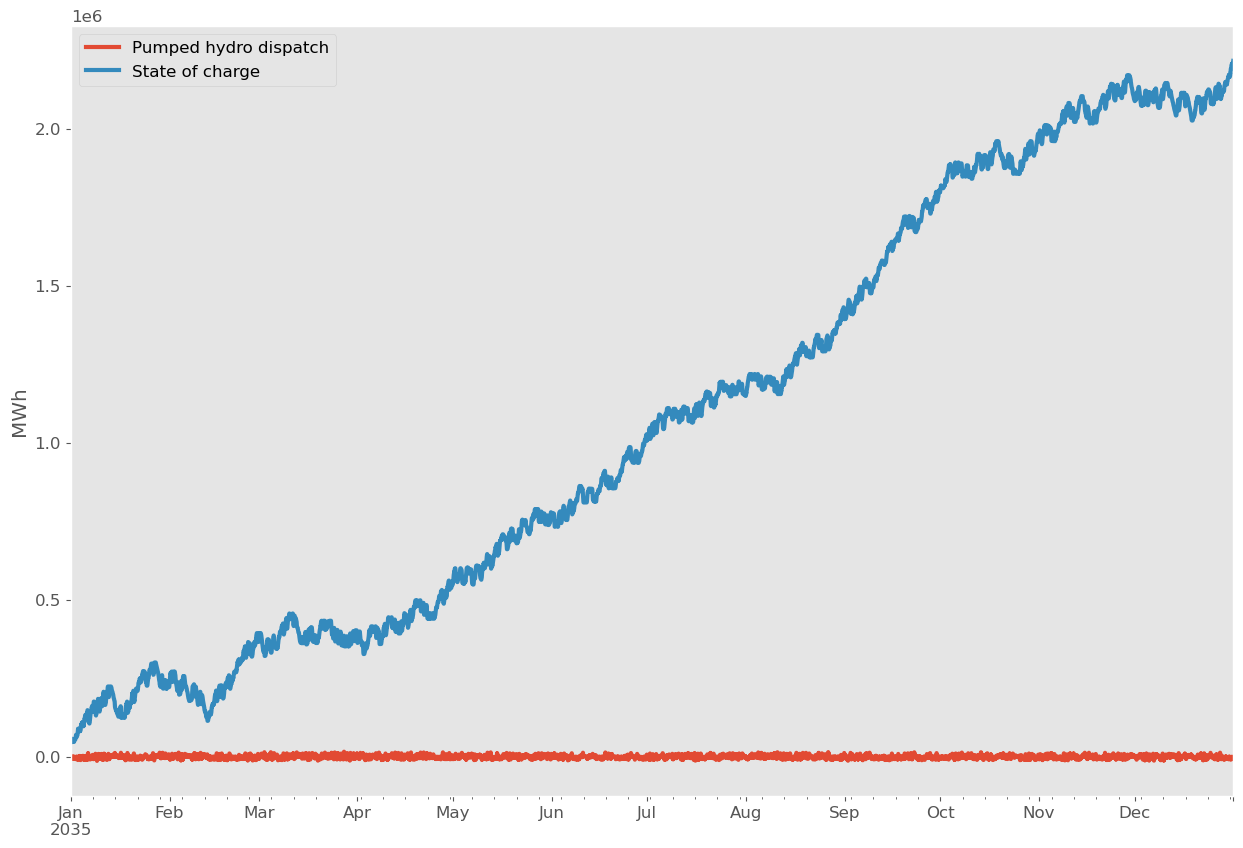

In [91]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

In [92]:
#plotting line loading

In [93]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

# Save the loading data to a CSV file
loading.to_csv('line_loading_snapshot_2856.csv', header=True)

With the linear load flow, there is the following per unit loading:


In [94]:
# Check the length of the snapshots
num_snapshots = len(network.snapshots)
print(f"The network has {num_snapshots} snapshots.")

The network has 17520 snapshots.


In [95]:
# Choose a valid snapshot index
snapshot_index = 47  # Select the last available snapshot, for example
now = network.snapshots[snapshot_index]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
print(loading.describe())

# Save the loading data to a CSV file
loading.to_csv('line_loading_snapshot_47.csv', header=True)

With the linear load flow, there is the following per unit loading:
count    9.900000e+01
mean    -1.178109e-10
std      1.201766e-09
min     -6.018973e-09
25%     -5.906096e-10
50%     -1.411786e-10
75%      3.198919e-10
max      3.453442e-09
dtype: float64


C:\Users\rachm\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(<matplotlib.collections.PatchCollection at 0x22f07f8bbd0>,
 <matplotlib.collections.LineCollection at 0x22f07f88f90>)

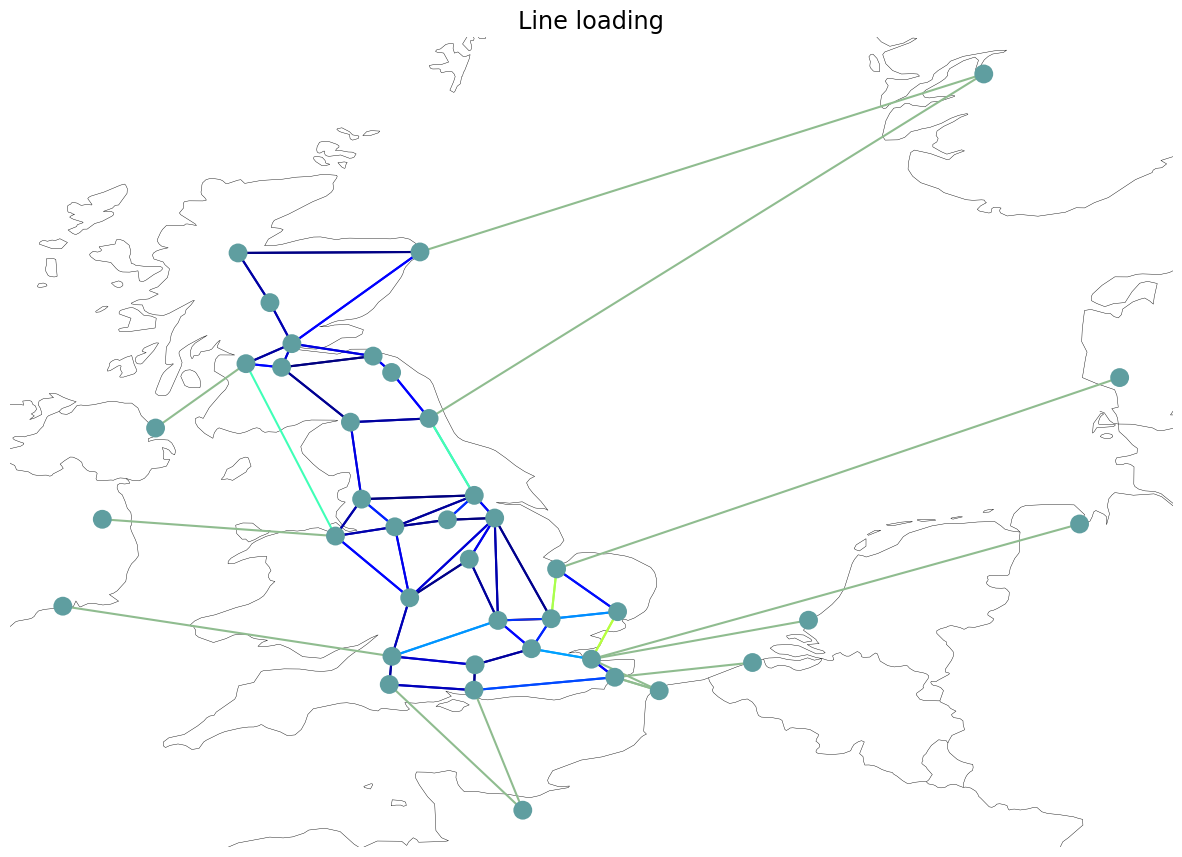

In [96]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

C:\Users\rachm\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".

C:\Users\rachm\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\rachm\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



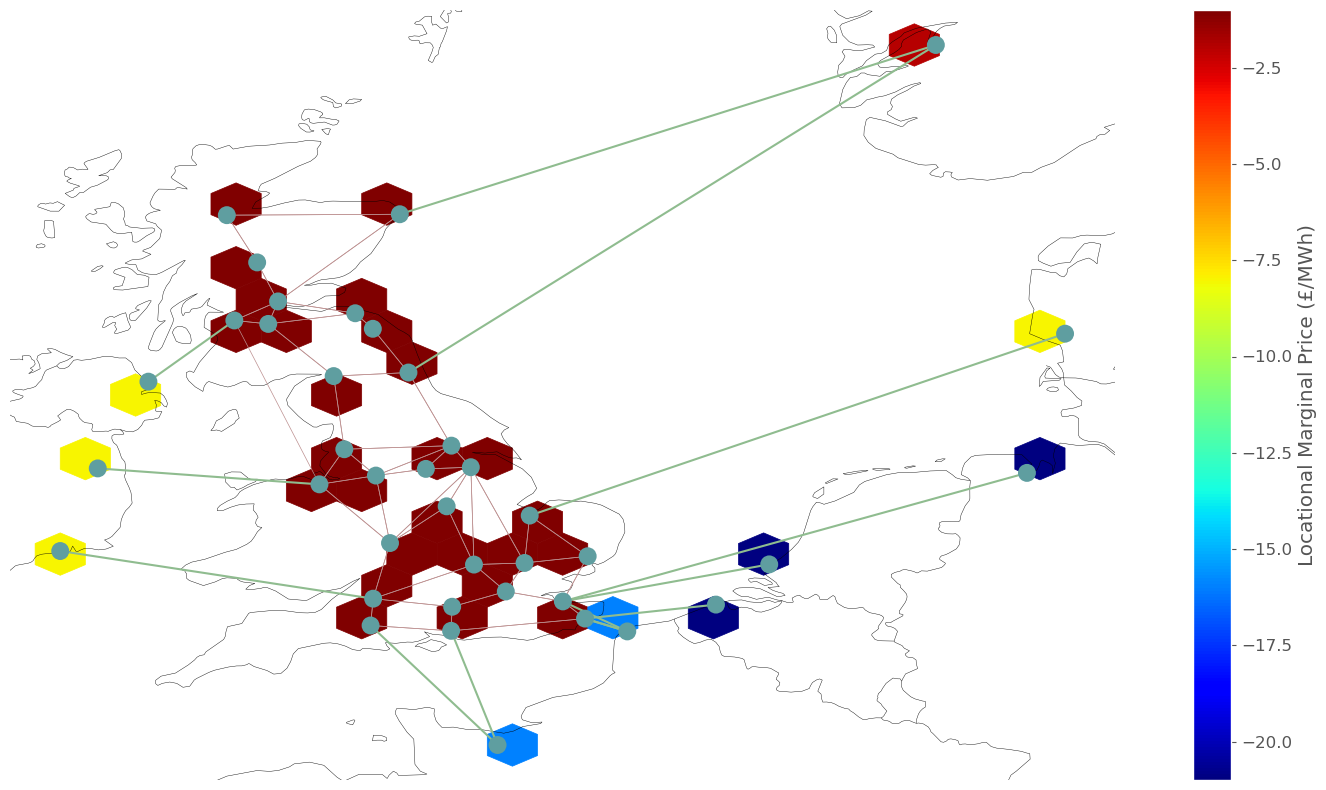

In [97]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [98]:
network.buses_t.marginal_price

Bus                  Beauly  Peterhead  Errochty  Denny/Bonnybridge  Neilston  \
snapshot                                                                        
2035-01-01 00:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 00:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 02:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
...                     ...        ...       ...                ...       ...   
2035-12-31 21:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 22:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 22:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 23:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-12-31 23:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   

Bus                  Strathaven  Torness  Eccles  Harker  Stella West  ...  \
snapshot                                                               ...   
2035-01-01 00:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 00:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 02:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
...                         ...      ...     ...     ...          ...  ...   
2035-12-31 21:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 22:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 22:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 23:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-12-31 23:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   

Bus                  Netherlands  Belgium  France1  France2  Ireland  \
snapshot                                                               
2035-01-01 00:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 00:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 01:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 01:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-01-01 02:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
...                          ...      ...      ...      ...      ...   
2035-12-31 21:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 22:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 22:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 23:00:00        -21.0    -21.0    -16.0    -16.0     -8.0   
2035-12-31 23:30:00        -21.0    -21.0    -16.0    -16.0     -8.0   

Bus                  N. Ireland  Denmark  Germany  Ireland2  Norway  
snapshot                                                             
2035-01-01 00:00:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-01-01 00:30:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-01-01 01:00:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-01-01 01:30:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-01-01 02:00:00        -8.0     -8.0    -21.0      -8.0    -2.0  
...                         ...      ...      ...       ...     ...  
2035-12-31 21:30:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-12-31 22:00:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-12-31 22:30:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-12-31 23:00:00        -8.0     -8.0    -21.0      -8.0    -2.0  
2035-12-31 23:30:00        -8.0     -8.0    -21.0      -8.0    -2.0  

[17520 rows x 39 columns]

In [81]:
# Display the first few rows of the DataFrame
print(network.buses_t.marginal_price.head())

# Display the structure and data types of the DataFrame
print(network.buses_t.marginal_price.info())

# Display summary statistics
print(network.buses_t.marginal_price.describe())


Bus                  Beauly  Peterhead  Errochty  Denny/Bonnybridge  Neilston  \
snapshot                                                                        
2035-01-01 00:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 00:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 01:30:00    -1.0       -1.0      -1.0               -1.0      -1.0   
2035-01-01 02:00:00    -1.0       -1.0      -1.0               -1.0      -1.0   

Bus                  Strathaven  Torness  Eccles  Harker  Stella West  ...  \
snapshot                                                               ...   
2035-01-01 00:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 00:30:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:00:00        -1.0     -1.0    -1.0    -1.0         -1.0  ...   
2035-01-01 01:30:00        -1.0     -1.0  

In [99]:
#saving the data into csv

# Define the filename for the CSV file
csv_filename = 'marginal_prices_2035_unified_FallingShort.csv'

# Save the marginal prices to a CSV file
network.buses_t.marginal_price.to_csv(csv_filename)

print(f"Marginal prices have been saved to {csv_filename}")


Marginal prices have been saved to marginal_prices_2035_unified_FallingShort.csv


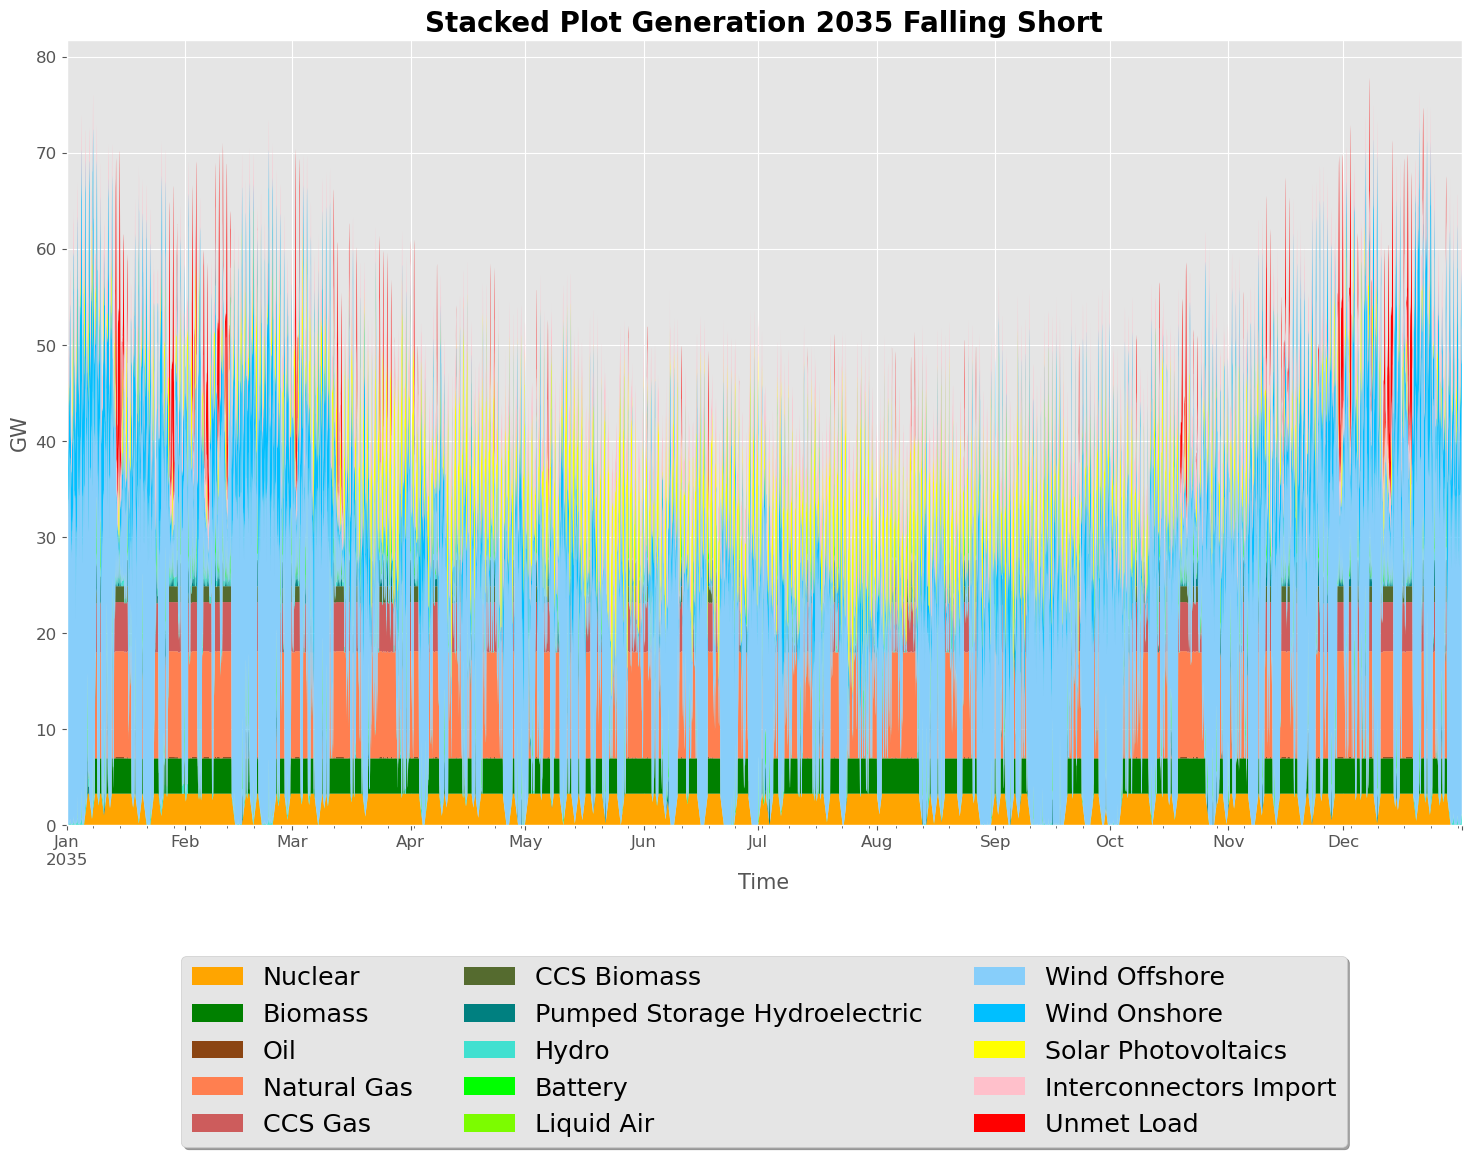

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `network` is an already defined object with necessary attributes

# Group power generation by carrier type and sum across all time steps
p_by_carrier = network.generators_t.p.T.groupby(network.generators.carrier).sum().T

# Group storage power by carrier type and sum
storage_by_carrier = network.storage_units_t.p.T.groupby(network.storage_units.carrier).sum().T

# Set negative storage values (discharging) to zero
storage_by_carrier[storage_by_carrier < 0] = 0

# Combine generation and storage data
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# Calculate interconnector imports (positive values)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

# Calculate interconnector exports (negative values)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Group biomass data together
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# Rename hydro and interconnector columns
p_by_carrier = p_by_carrier.rename(columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(columns={'Interconnector': 'Interconnectors Import'})

# Save the data to CSV
p_by_carrier.to_csv('power_generation_by_carrier.csv', index=True)

# Define colors for each carrier
colors = {
    "Coal": "grey",
    "Diesel/Gas oil": "black",
    "Diesel/gas Diesel/Gas oil": "darkgrey",
    'Oil': 'saddlebrown',
    'Unmet Load': 'red',
    'Anaerobic Digestion': 'forestgreen',
    'Waste': 'chocolate',
    'Sewage Sludge Digestion': 'olivedrab',
    'Landfill Gas': 'green',
    'Biomass (dedicated)': 'darkgreen',
    'Biomass (co-firing)': 'lightgreen',
    'Biomass': 'green',
    'CCS Biomass': 'darkolivegreen',
    'Interconnectors Import': 'pink',
    'B6 import': 'hotpink',
    "Sour gas": "lightcoral",
    "Natural Gas": "coral",
    'CCS Gas': "indianred",
    'Hydrogen': "deeppink",
    "Nuclear": "orange",
    'Shoreline Wave': 'aqua',
    'Tidal Barrage and Tidal Stream': 'aquamarine',
    'Hydro': "turquoise",
    "Large Hydro": "darkturquoise",
    "Small Hydro": "lightseagreen",
    "Pumped Storage Hydroelectric": "teal",
    'Battery': 'lime',
    'Compressed Air': 'greenyellow',
    'Liquid Air': 'lawngreen',
    "Wind Offshore": "lightskyblue",
    'Wind Onshore': 'deepskyblue',
    'Solar Photovoltaics': 'yellow'
}

# Filter columns for plotting
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

# Drop columns with maximum values less than 50
p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

# Create the area plot
fig, ax = plt.subplots(1, 1, figsize=(18, 12))  # Adjusted figure size for better readability
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Adjust the plot layout and add legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,  # Increased bottom space for legend
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3, fontsize='small')  # Adjusted legend fontsize and position

# Add title to the plot
ax.set_title("Stacked Plot Generation 2035 Falling Short", fontsize=20, fontweight='bold')

ax.set_ylabel("GW", fontsize=15)
ax.set_xlabel("Time", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


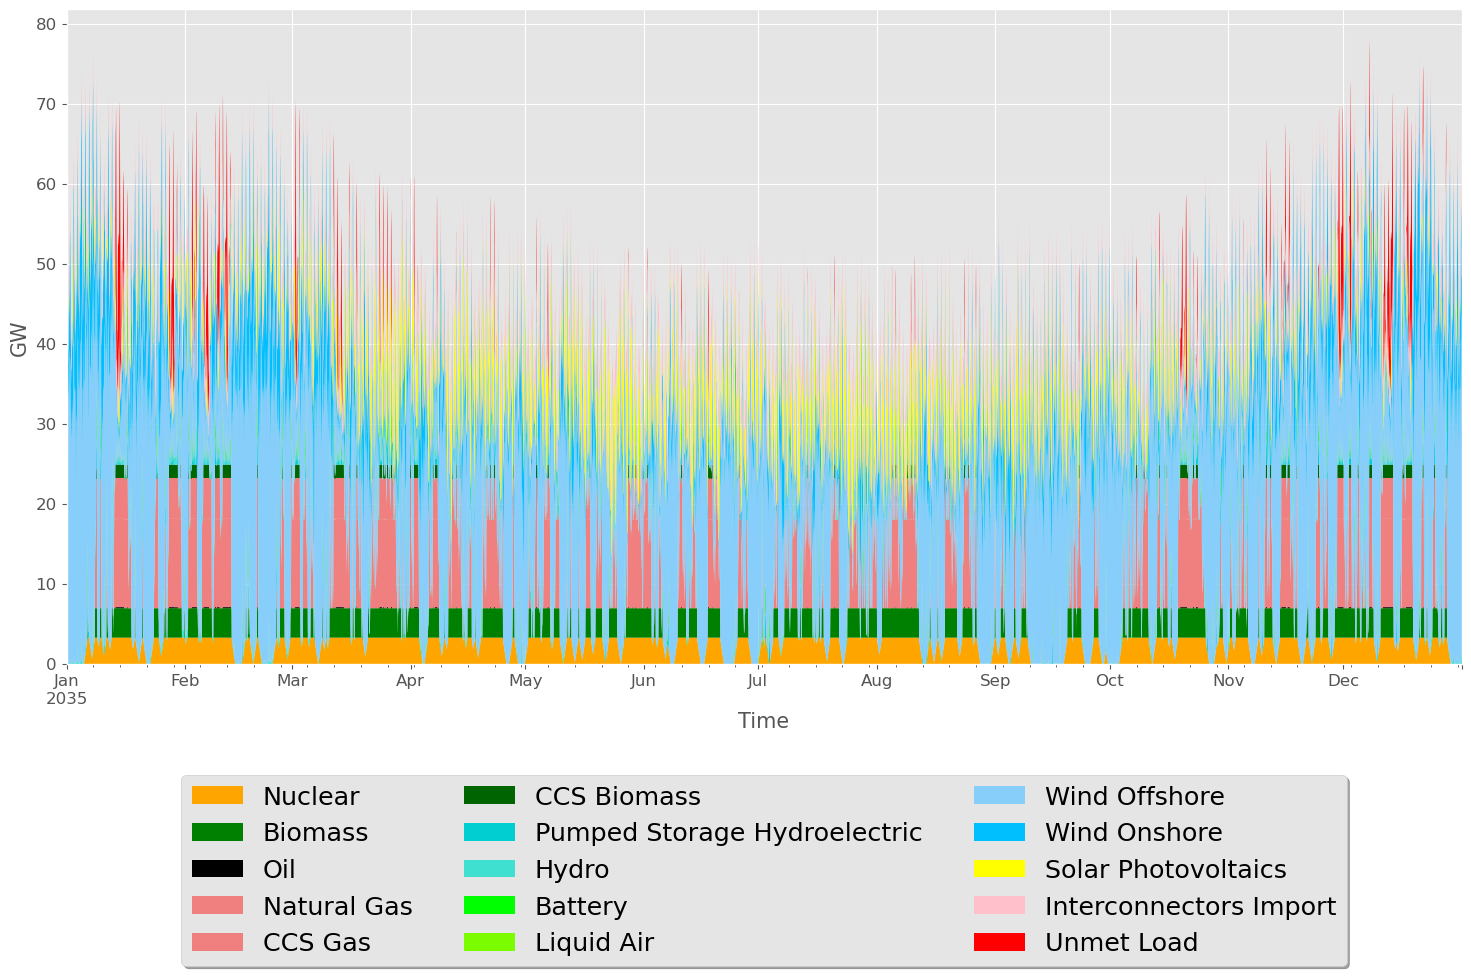

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `network` is an already defined object with necessary attributes

# Group power generation by carrier type and sum across all time steps
p_by_carrier = network.generators_t.p.T.groupby(network.generators.carrier).sum().T

# Group storage power by carrier type and sum
storage_by_carrier = network.storage_units_t.p.T.groupby(network.storage_units.carrier).sum().T

# Set negative storage values (discharging) to zero
storage_by_carrier[storage_by_carrier < 0] = 0

# Combine generation and storage data
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# Calculate interconnector imports (positive values)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

# Calculate interconnector exports (negative values)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Group biomass data together
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# Rename hydro and interconnector columns
p_by_carrier = p_by_carrier.rename(columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(columns={'Interconnector': 'Interconnectors Import'})

# Save the data to CSV
p_by_carrier.to_csv('power_generation_by_carrier.csv', index=True)

# Define colors for each carrier
colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'red',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

# Filter columns for plotting
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

# Drop columns with maximum values less than 50
p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

# Create the area plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))  # Adjusted figure size for better readability
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Adjust the plot layout and add legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3, fontsize='small')  # Adjusted legend fontsize and position

ax.set_ylabel("GW", fontsize=15)
ax.set_xlabel("Time", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


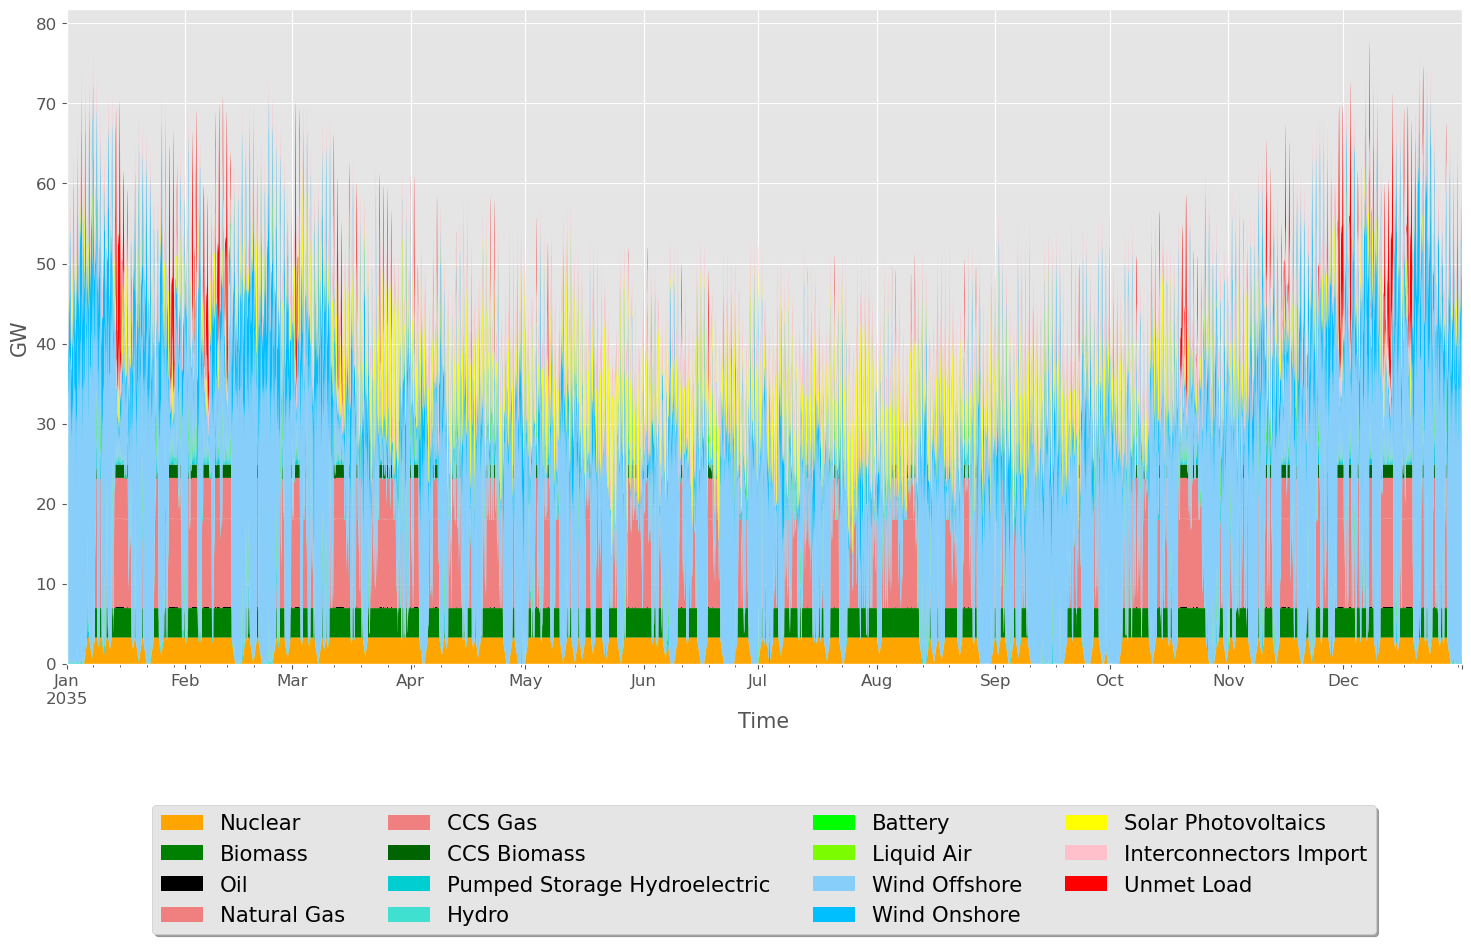

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `network` is an already defined object with necessary attributes

# Group power generation by carrier type and sum across all time steps
p_by_carrier = network.generators_t.p.T.groupby(network.generators.carrier).sum().T

# Group storage power by carrier type and sum
storage_by_carrier = network.storage_units_t.p.T.groupby(network.storage_units.carrier).sum().T

# Set negative storage values (discharging) to zero
storage_by_carrier[storage_by_carrier < 0] = 0

# Combine generation and storage data
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# Calculate interconnector imports (positive values)
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

# Calculate interconnector exports (negative values)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Group biomass data together
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# Rename hydro and interconnector columns
p_by_carrier = p_by_carrier.rename(columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(columns={'Interconnector': 'Interconnectors Import'})

# Save the data to CSV
p_by_carrier.to_csv('power_generation_by_carrier.csv', index=True)

# Define colors for each carrier
colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'red',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

# Filter columns for plotting
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Interconnectors Import', 'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

# Drop columns with maximum values less than 50
p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

# Create the area plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))  # Adjusted figure size for better readability
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Adjust the plot layout and add legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.15,
                 box.width, box.height * 0.85])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=4, fontsize='x-small')  # Adjusted legend fontsize and position

ax.set_ylabel("GW", fontsize=15)
ax.set_xlabel("Time", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
